<a href="https://colab.research.google.com/github/SergioMoraa/Parcial-1/blob/main/Parcial_TAM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn pandas

In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Cargar el Ames Housing dataset desde OpenML
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto')

# El conjunto de datos completo está en housing.frame
# Las características (X) están en housing.data
# La variable objetivo (y) (SalePrice) está en housing.target
X = housing.data
y = housing.target

# Mostrar las primeras filas de las características y la variable objetivo
print("Primeras 5 filas de las características (X):")
print(X.head())
print("\nPrimeras 5 filas de la variable objetivo (y):")
print(y.head())

print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

Primeras 5 filas de las características (X):
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleC

Intentando cargar el conjunto de datos Ames Housing (puede tardar un momento)...
Conjunto de datos cargado exitosamente.

--- 1. Recuento de Valores Faltantes por Columna (Top 15) ---
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageFinish      81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
dtype: int64

--- 2. Distribución de la Variable Objetivo (SalePrice) ---


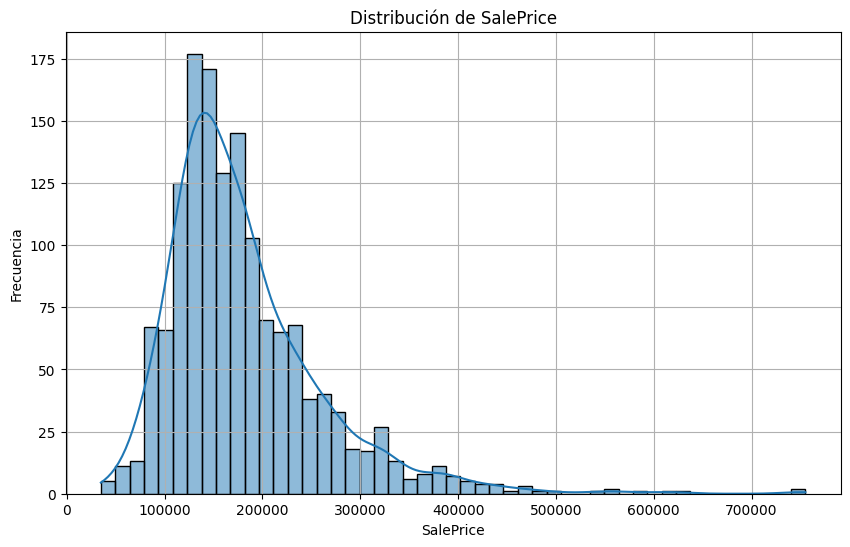

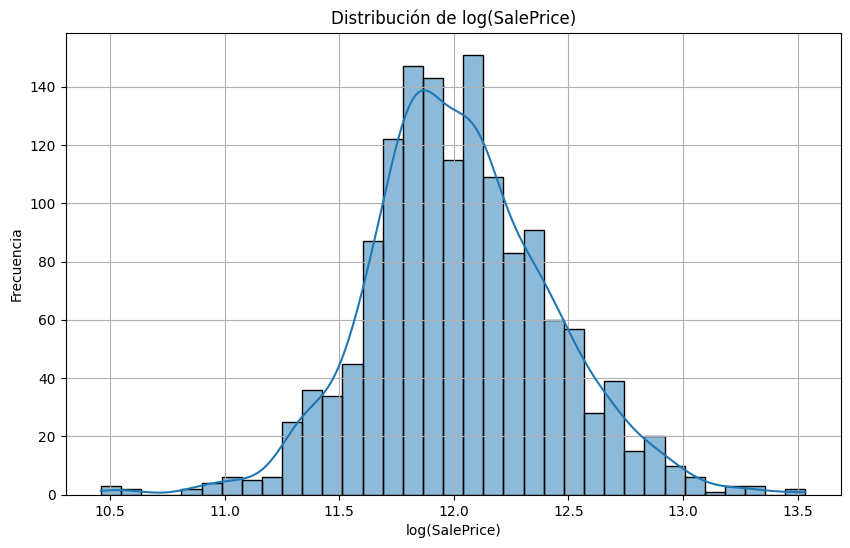


--- 3. Correlaciones con la Variable Objetivo (SalePrice) ---

Características más correlacionadas con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Características menos correlacionadas (o más negativamente) con SalePrice:
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


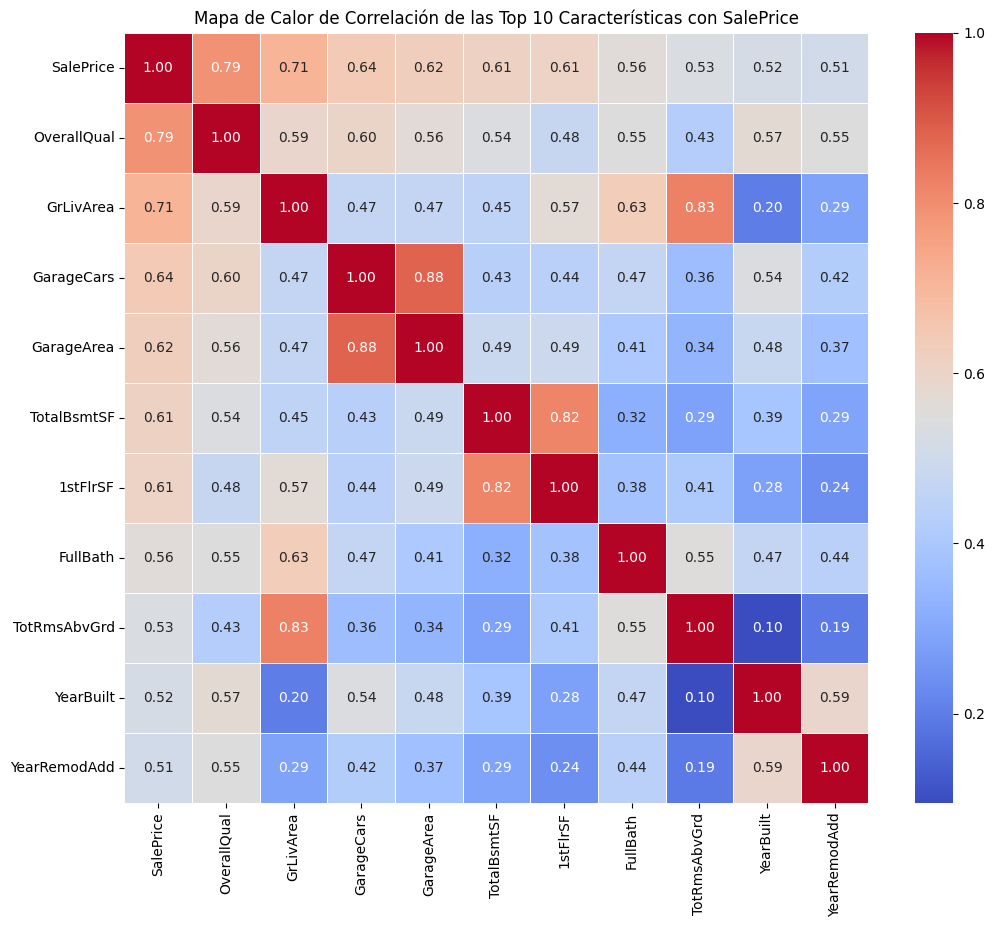


--- 4. Resumen de Características Categóricas (Número de Valores Únicos) ---
Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Heating           6
Foundation        6
GarageType        6
ExterCond         5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
BldgType          5
FireplaceQu       5
LandContour       4
LotShape          4
BsmtExposure      4
MiscFeature       4
KitchenQual       4
Fence             4
MasVnrType        4
BsmtCond          4
BsmtQual          4
ExterQual         4
PoolQC            3
GarageFinish      3
PavedDrive        3
LandSlope         3
Utilities         2
Alley             2
Street            2
CentralAir        2
dtype: int64

--- Información General Adicional ---

Dimension

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

def explore_important_dataset_info():
    """
    Carga el Ames Housing dataset y muestra información clave:
    valores faltantes, distribución del objetivo, correlaciones y
    resumen de características categóricas.
    """
    try:
        print("Intentando cargar el conjunto de datos Ames Housing (puede tardar un momento)...")
        housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
        X = housing.data
        y = housing.target
        print("Conjunto de datos cargado exitosamente.")

        # Asegurar que y es una Serie de pandas y tiene un nombre
        target_name = 'SalePrice'
        if hasattr(housing, 'target_names') and housing.target_names and \
           isinstance(housing.target_names, list) and len(housing.target_names) > 0:
            target_name = housing.target_names[0]
        if not isinstance(y, pd.Series):
            y = pd.Series(y, name=target_name)
        elif y.name is None:
            y.name = target_name

        # 1. Recuento de Valores Faltantes
        print("\n--- 1. Recuento de Valores Faltantes por Columna (Top 15) ---")
        missing_values = X.isnull().sum().sort_values(ascending=False)
        print(missing_values[missing_values > 0].head(15)) # Mostrar solo columnas con faltantes, top 15

        # 2. Distribución de la Variable Objetivo (SalePrice)
        print(f"\n--- 2. Distribución de la Variable Objetivo ({y.name}) ---")
        plt.figure(figsize=(10, 6))
        sns.histplot(y, kde=True)
        plt.title(f'Distribución de {y.name}')
        plt.xlabel(y.name)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

        # También es común ver la distribución del logaritmo del precio si está sesgada
        plt.figure(figsize=(10, 6))
        sns.histplot(np.log1p(y), kde=True) # np.log1p es log(1+x) para manejar ceros si los hubiera
        plt.title(f'Distribución de log({y.name})')
        plt.xlabel(f'log({y.name})')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

        # 3. Correlaciones con la Variable Objetivo
        print(f"\n--- 3. Correlaciones con la Variable Objetivo ({y.name}) ---")
        # Para el cálculo de correlación, solo usamos columnas numéricas de X
        X_numerical = X.select_dtypes(include=np.number)
        # Combinamos con 'y' para calcular la correlación
        temp_df_for_corr = pd.concat([X_numerical, y], axis=1)
        correlations = temp_df_for_corr.corr()[y.name].sort_values(ascending=False)
        print("\nCaracterísticas más correlacionadas con SalePrice:")
        print(correlations.head(11)) # Top 10 + SalePrice misma
        print("\nCaracterísticas menos correlacionadas (o más negativamente) con SalePrice:")
        print(correlations.tail(10))

        # Mapa de calor de las N características más correlacionadas
        n_top_features = 10 # Número de características a mostrar en el heatmap
        top_corr_features = correlations.abs().nlargest(n_top_features + 1).index # +1 para incluir SalePrice
        correlation_map = temp_df_for_corr[top_corr_features].corr()

        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_map, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
        plt.title(f'Mapa de Calor de Correlación de las Top {n_top_features} Características con {y.name}')
        plt.show()

        # 4. Resumen de Características Categóricas (Número de valores únicos)
        print("\n--- 4. Resumen de Características Categóricas (Número de Valores Únicos) ---")
        categorical_cols = X.select_dtypes(include=['object', 'category']).columns
        if not categorical_cols.empty:
            unique_values_categorical = X[categorical_cols].nunique().sort_values(ascending=False)
            print(unique_values_categorical)
        else:
            print("No se encontraron características categóricas.")

        # Información general que también es útil (ya se cubrió antes pero es bueno recordarla)
        print("\n--- Información General Adicional ---")
        print("\nDimensiones de X (características):", X.shape)
        print("Dimensiones de y (objetivo):", y.shape)
        print("\nPrimeras filas de X:")
        print(X.head())
        print(f"\nPrimeras filas de y ({y.name}):")
        print(y.head())


    except Exception as e:
        print(f"Ocurrió un error al cargar o procesar el conjunto de datos.")
        print(f"Detalles del error: {type(e).__name__}: {e}")
        print("Asegúrate de tener conexión a internet para descargar el conjunto de datos.")
        print("Si el problema persiste, el servidor de OpenML podría estar temporalmente inaccesible,")
        print("o el nombre/versión/parser del dataset podría necesitar ajuste.")

if __name__ == '__main__':
    explore_important_dataset_info()

In [4]:
pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 10.1 MB/s eta 0:00:00


In [5]:
pip install scikit-learn pandas numpy scikit-optimize matplotlib seaborn

In [6]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Asegúrate de tener conexión a internet y las librerías actualizadas.")
    print("Como alternativa, considera descargar el CSV y cargarlo con pd.read_csv().")
    exit()

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

# Identificar características numéricas y categóricas
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...") # Muestra algunas
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...") # Muestra algunas


# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # o 'passthrough' si hay otras columnas que quieres mantener y sabes cómo manejarlas
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (Ejemplo: RandomForestRegressor) ---
# Para otros regresores, deberás definir instancias y espacios de búsqueda similares.
regressor_model = RandomForestRegressor(random_state=42)
regressor_name = "RandomForestRegressor"

# Espacios de búsqueda para RandomForestRegressor
# Nota: Estos son ejemplos, ajústalos según tu conocimiento y tiempo disponible.
# Para GridSearchCV (rejilla más pequeña)
param_grid_rf = {
    'regressor__n_estimators': [100, 200], # Reducido para ejemplo
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Para RandomizedSearchCV (distribuciones más amplias)
param_dist_rf = {
    'regressor__n_estimators': Integer(50, 300), # skopt.space.Integer si usas skopt para Random, o lista para sklearn
    'regressor__max_depth': Integer(5, 50), # O [5, 10, 20, 30, 40, 50, None]
    'regressor__min_samples_split': Integer(2, 20),
    'regressor__min_samples_leaf': Integer(1, 20),
    'regressor__max_features': Categorical(['sqrt', 'log2', 0.5, 0.7]) # Usar Categorical de skopt.space
}
# Para RandomizedSearchCV de sklearn, las distribuciones se importan de scipy.stats
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_dist_rf_sklearn = {
    'regressor__n_estimators': sp_randint(50, 301),
    'regressor__max_depth': sp_randint(5, 51),
    'regressor__min_samples_split': sp_randint(2, 21),
    'regressor__min_samples_leaf': sp_randint(1, 21),
    'regressor__max_features': ['sqrt', 'log2'] + list(np.random.uniform(0.3, 1.0, 3)) # Combinación de opciones
}


# Para Optimización Bayesiana (skopt.space)
space_rf = [
    Integer(50, 300, name='n_estimators'),
    Integer(5, 50, name='max_depth'), # None no es directamente manejable por Integer, se podría mapear o excluir.
                                     # O usar Categorical([10,20,30, None]) y ajustar el objective
    Integer(2, 20, name='min_samples_split'),
    Integer(1, 20, name='min_samples_leaf'),
    Categorical(['sqrt', 'log2', 0.5, 0.7, 1.0], name='max_features') # 1.0 es equivalente a None para max_features en RF si es float
]
# Es importante que los nombres en 'space_rf' coincidan con los parámetros del regresor.

print(f"\nConfiguración para {regressor_name} definida.")

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación (CV Externa) ---
def evaluate_model_with_cv(pipeline_with_best_regressor, X_data, y_data_log, model_name_detail):
    kf_external = KFold(n_splits=5, shuffle=True, random_state=123)
    fold_metrics = {'mae': [], 'mse': [], 'r2': [], 'mape': []}

    print(f"  Evaluando {model_name_detail} con CV externa de 5 folds...")
    fold_num = 1
    for train_idx, test_idx in kf_external.split(X_data, y_data_log):
        X_train_fold, X_test_fold = X_data.iloc[train_idx], X_data.iloc[test_idx]
        y_train_fold_log, y_test_fold_log = y_data_log.iloc[train_idx], y_data_log.iloc[test_idx]

        pipeline_with_best_regressor.fit(X_train_fold, y_train_fold_log)
        y_pred_log = pipeline_with_best_regressor.predict(X_test_fold)

        # Transformar inversamente
        y_pred_original = np.expm1(y_pred_log)
        y_test_fold_original = np.expm1(y_test_fold_log)

        # Corregir posibles ceros en y_test_fold_original para MAPE, aunque SalePrice no debería ser 0.
        # y_test_fold_original_mape = np.where(y_test_fold_original == 0, 1e-9, y_test_fold_original)


        fold_metrics['mae'].append(mean_absolute_error(y_test_fold_original, y_pred_original))
        fold_metrics['mse'].append(mean_squared_error(y_test_fold_original, y_pred_original))
        fold_metrics['r2'].append(r2_score(y_test_fold_original, y_pred_original))
        try:
            fold_metrics['mape'].append(mean_absolute_percentage_error(y_test_fold_original, y_pred_original))
        except ValueError as e_mape: # En caso de y_true = 0
             print(f"Advertencia MAPE fold {fold_num}: {e_mape}. Agregando NaN.")
             fold_metrics['mape'].append(np.nan)

        print(f"    Fold {fold_num} completado.")
        fold_num += 1

    return {metric: (np.nanmean(values), np.nanstd(values)) for metric, values in fold_metrics.items()}


# === Optimización y Evaluación para RandomForestRegressor ===

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_gs = Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])
# Reducir cv para pruebas rápidas, idealmente 3 o 5
grid_search = GridSearchCV(pipeline_gs, param_grid_rf, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X, y_log) # Usar todos los datos para la búsqueda de hiperparámetros
end_time = time.time()
print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")

# Evaluar el mejor modelo de GridSearchCV
best_params_gs_cleaned = {k.split('__')[1]: v for k, v in grid_search.best_params_.items()}
final_model_gs = RandomForestRegressor(**best_params_gs_cleaned, random_state=42)
pipeline_final_gs = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_gs)])
metrics_gs = evaluate_model_with_cv(pipeline_final_gs, X, y_log, f"{regressor_name} (GridSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs})


# --- B. RandomizedSearchCV ---
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])
# Reducir n_iter y cv para pruebas rápidas
random_search = RandomizedSearchCV(pipeline_rs, param_dist_rf_sklearn, n_iter=10, cv=2, # n_iter=50-100, cv=3-5 es más robusto
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X, y_log)
end_time = time.time()
print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")

# Evaluar el mejor modelo de RandomizedSearchCV
best_params_rs_cleaned = {k.split('__')[1]: v for k, v in random_search.best_params_.items()}
final_model_rs = RandomForestRegressor(**best_params_rs_cleaned, random_state=42)
pipeline_final_rs = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_rs)])
metrics_rs = evaluate_model_with_cv(pipeline_final_rs, X, y_log, f"{regressor_name} (RandomSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

# Es importante que la función objetivo use una nueva instancia del regresor en cada llamada
# o configure los parámetros correctamente.
@use_named_args(space_rf)
def objective_rf(**params):
    # Asegurar que max_depth no sea None si el space lo genera como float/int
    # Aquí space_rf no genera None para max_depth, pero es algo a tener en cuenta
    # Si 'max_features' se define como Real(0.1, 1.0) y el modelo espera int o 'auto'/'sqrt', se debe convertir.
    # En este space_rf, max_features es Categorical y ya incluye 'sqrt', 'log2'.

    current_regressor = RandomForestRegressor(random_state=42, n_jobs=-1, **params) # n_jobs=-1 para el RF interno
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])

    # CV interna para la función objetivo. Usar X, y_log (todos los datos disponibles)
    # Reducir cv para pruebas rápidas.
    # n_jobs para cross_val_score no es compatible con todos los regresores si ellos ya usan n_jobs.
    # Aquí RandomForestRegressor tiene n_jobs, así que es mejor no usarlo en cross_val_score o ponerlo a 1.
    scores = cross_val_score(pipeline_bo, X, y_log, cv=2, scoring='neg_mean_squared_error', n_jobs=1)
    return -np.mean(scores) # skopt minimiza, y queremos minimizar MSE (maximizar -MSE)

# Reducir n_calls para pruebas rápidas. n_calls=30-50 es más robusto.
# n_jobs=-1 en gp_minimize puede acelerar si la función objetivo es costosa y paralizable internamente
# (como cross_val_score con n_jobs=1 y un regresor que usa n_jobs=-1).
# Si hay problemas de anidación de paralelismo, poner n_jobs=1 aquí.
res_gp_rf = gp_minimize(objective_rf, space_rf, n_calls=10, random_state=42, verbose=1, n_jobs=1) # n_calls=10
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")
best_params_bo_values = res_gp_rf.x
best_params_bo = {dim.name: val for dim, val in zip(space_rf, best_params_bo_values)}
print(f"Mejores hiperparámetros (Bayesian Opt): {best_params_bo}")

# Evaluar el mejor modelo de Optimización Bayesiana
final_model_bo = RandomForestRegressor(**best_params_bo, random_state=42)
pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
metrics_bo = evaluate_model_with_cv(pipeline_final_bo, X, y_log, f"{regressor_name} (Bayesian Opt)")
results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo})


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)

for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_mean'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df[f'{metric_name.upper()}_std'] = results_df[metric_name].apply(lambda x: x[1] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'MAE_mean', 'MAE_std', 'MSE_mean', 'MSE_std', 'R2_mean', 'R2_std', 'MAPE_mean', 'MAPE_std']])

print("\n\nConsideraciones Finales:")
print("- Reemplace 'RandomForestRegressor' y sus espacios de búsqueda para otros modelos.")
print("- Ajuste 'cv' en GridSearchCV/RandomizedSearchCV/cross_val_score y 'n_iter'/'n_calls' para balancear robustez y tiempo.")
print("- Los resultados pueden variar ligeramente debido a la aleatoriedad en KFold, modelos y optimizadores.")
print("- Asegúrese de que los nombres de los parámetros en los diccionarios/espacios coincidan con los del pipeline (prefijo 'regressor__').")
print("- La Optimización Bayesiana puede ser sensible a la definición del espacio y la función objetivo.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para RandomForestRegressor definida.

--- Iniciando GridSearchCV para RandomForestRegressor ---
Fitting 2 folds for each of 24 candidates, totalling 48 fits
GridSearchCV completado en 126.20 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
  Evaluando RandomForestRegressor (GridSearch) con CV externa de 5 folds...
    Fold 1 completado.
    Fold 2 completado.
    Fold 3 completado.
    Fold 4 completado.
    Fold 5 completado.

--- Iniciando RandomizedSearchCV para RandomForestRegressor ---
Fitti


--- 2. Distribución de la Variable Objetivo (SalePrice) ---


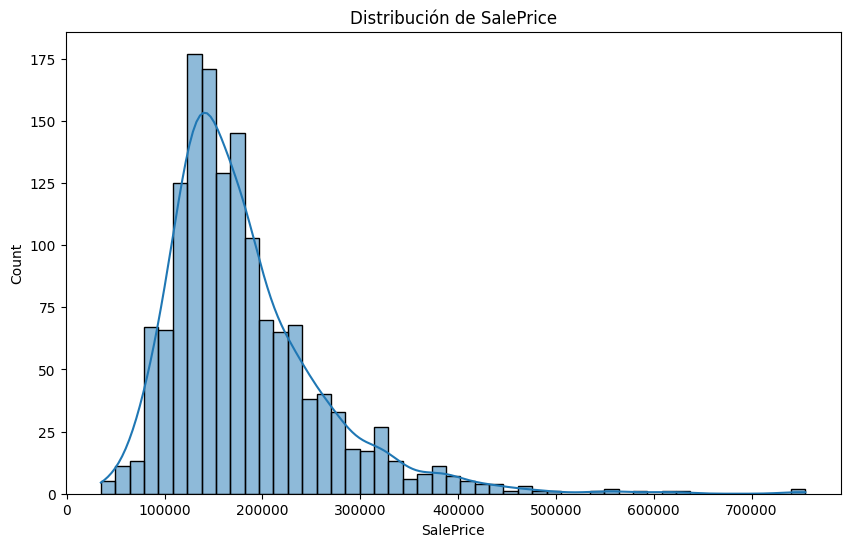

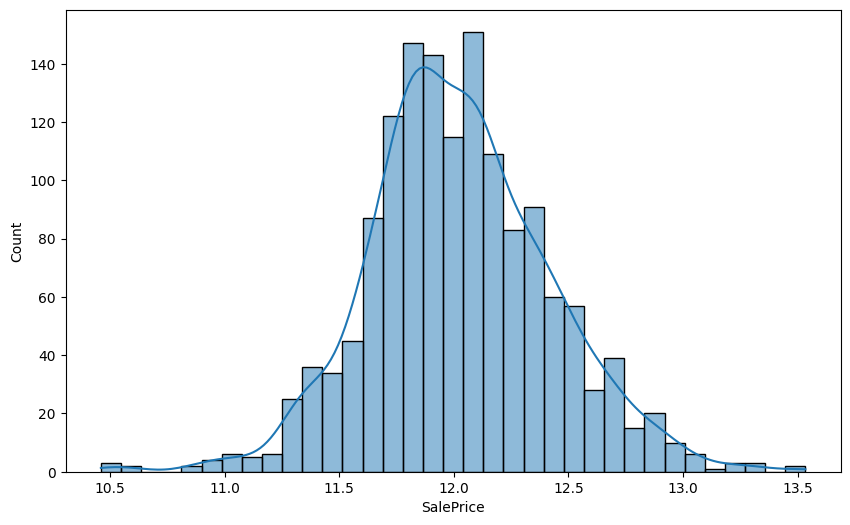

In [15]:
# 2. Distribución de la Variable Objetivo (SalePrice)
print(f"\n--- 2. Distribución de la Variable Objetivo ({y.name}) ---")
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title(f'Distribución de {y.name}')
# ... otros detalles del plot ...
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(y), kde=True) # Distribución del logaritmo
# ... otros detalles del plot ...
plt.show()

In [16]:
# 3. Correlaciones con la Variable Objetivo
print(f"\n--- 3. Correlaciones con la Variable Objetivo ({y.name}) ---")
X_numerical = X.select_dtypes(include=np.number)
temp_df_for_corr = pd.concat([X_numerical, y], axis=1)
correlations = temp_df_for_corr.corr()[y.name].sort_values(ascending=False)
print("\nCaracterísticas más correlacionadas con SalePrice:")
print(correlations.head(11))

# Mapa de calor
# ... código para seleccionar top features y crear heatmap ...
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_map, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title(f'Mapa de Calor de Correlación de las Top {n_top_features} Características con {y.name}')
plt.show()


--- 3. Correlaciones con la Variable Objetivo (SalePrice) ---

Características más correlacionadas con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


NameError: name 'correlation_map' is not defined

<Figure size 1200x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(X['GrLivArea'], kde=True)
plt.title('Distribución de GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [3]:
# Instalar la biblioteca scikit-optimize para optimización bayesiana
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 10.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Asegúrate de tener conexión a internet y las librerías actualizadas.")
    print("Como alternativa, considera descargar el CSV y cargarlo con pd.read_csv().")
    exit()

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

# Identificar características numéricas y categóricas
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...") # Muestra algunas
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...") # Muestra algunas


# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # o 'passthrough' si hay otras columnas que quieres mantener y sabes cómo manejarlas
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (Ejemplo: RandomForestRegressor) ---
# Para otros regresores, deberás definir instancias y espacios de búsqueda similares.
regressor_model = RandomForestRegressor(random_state=42)
regressor_name = "RandomForestRegressor"

# Espacios de búsqueda para RandomForestRegressor
# Nota: Estos son ejemplos, ajústalos según tu conocimiento y tiempo disponible.
# Para GridSearchCV (rejilla más pequeña)
param_grid_rf = {
    'regressor__n_estimators': [100, 200], # Reducido para ejemplo
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Para RandomizedSearchCV (distribuciones más amplias)
param_dist_rf = {
    'regressor__n_estimators': Integer(50, 300), # skopt.space.Integer si usas skopt para Random, o lista para sklearn
    'regressor__max_depth': Integer(5, 50), # O [5, 10, 20, 30, 40, 50, None]
    'regressor__min_samples_split': Integer(2, 20),
    'regressor__min_samples_leaf': Integer(1, 20),
    'regressor__max_features': Categorical(['sqrt', 'log2', 0.5, 0.7]) # Usar Categorical de skopt.space
}
# Para RandomizedSearchCV de sklearn, las distribuciones se importan de scipy.stats
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_dist_rf_sklearn = {
    'regressor__n_estimators': sp_randint(50, 301),
    'regressor__max_depth': sp_randint(5, 51),
    'regressor__min_samples_split': sp_randint(2, 21),
    'regressor__min_samples_leaf': sp_randint(1, 21),
    'regressor__max_features': ['sqrt', 'log2'] + list(np.random.uniform(0.3, 1.0, 3)) # Combinación de opciones
}


# Para Optimización Bayesiana (skopt.space)
space_rf = [
    Integer(50, 300, name='n_estimators'),
    Integer(5, 50, name='max_depth'), # None no es directamente manejable por Integer, se podría mapear o excluir.
                                     # O usar Categorical([10,20,30, None]) y ajustar el objective
    Integer(2, 20, name='min_samples_split'),
    Integer(1, 20, name='min_samples_leaf'),
    Categorical(['sqrt', 'log2', 0.5, 0.7, 1.0], name='max_features') # 1.0 es equivalente a None para max_features en RF si es float
]
# Es importante que los nombres en 'space_rf' coincidan con los parámetros del regresor.

print(f"\nConfiguración para {regressor_name} definida.")

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación (CV Externa) ---
def evaluate_model_with_cv(pipeline_with_best_regressor, X_data, y_data_log, model_name_detail):
    kf_external = KFold(n_splits=5, shuffle=True, random_state=123)
    fold_metrics = {'mae': [], 'mse': [], 'r2': [], 'mape': []}

    print(f"  Evaluando {model_name_detail} con CV externa de 5 folds...")
    fold_num = 1
    for train_idx, test_idx in kf_external.split(X_data, y_data_log):
        X_train_fold, X_test_fold = X_data.iloc[train_idx], X_data.iloc[test_idx]
        y_train_fold_log, y_test_fold_log = y_data_log.iloc[train_idx], y_data_log.iloc[test_idx]

        pipeline_with_best_regressor.fit(X_train_fold, y_train_fold_log)
        y_pred_log = pipeline_with_best_regressor.predict(X_test_fold)

        # Transformar inversamente
        y_pred_original = np.expm1(y_pred_log)
        y_test_fold_original = np.expm1(y_test_fold_log)

        # Corregir posibles ceros en y_test_fold_original para MAPE, aunque SalePrice no debería ser 0.
        # y_test_fold_original_mape = np.where(y_test_fold_original == 0, 1e-9, y_test_fold_original)


        fold_metrics['mae'].append(mean_absolute_error(y_test_fold_original, y_pred_original))
        fold_metrics['mse'].append(mean_squared_error(y_test_fold_original, y_pred_original))
        fold_metrics['r2'].append(r2_score(y_test_fold_original, y_pred_original))
        try:
            fold_metrics['mape'].append(mean_absolute_percentage_error(y_test_fold_original, y_pred_original))
        except ValueError as e_mape: # En caso de y_true = 0
             print(f"Advertencia MAPE fold {fold_num}: {e_mape}. Agregando NaN.")
             fold_metrics['mape'].append(np.nan)

        print(f"    Fold {fold_num} completado.")
        fold_num += 1

    return {metric: (np.nanmean(values), np.nanstd(values)) for metric, values in fold_metrics.items()}


# === Optimización y Evaluación para RandomForestRegressor ===

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_gs = Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])
# Reducir cv para pruebas rápidas, idealmente 3 o 5
grid_search = GridSearchCV(pipeline_gs, param_grid_rf, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X, y_log) # Usar todos los datos para la búsqueda de hiperparámetros
end_time = time.time()
print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")

# Evaluar el mejor modelo de GridSearchCV
best_params_gs_cleaned = {k.split('__')[1]: v for k, v in grid_search.best_params_.items()}
final_model_gs = RandomForestRegressor(**best_params_gs_cleaned, random_state=42)
pipeline_final_gs = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_gs)])
metrics_gs = evaluate_model_with_cv(pipeline_final_gs, X, y_log, f"{regressor_name} (GridSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs})


# --- B. RandomizedSearchCV ---
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])
# Reducir n_iter y cv para pruebas rápidas
random_search = RandomizedSearchCV(pipeline_rs, param_dist_rf_sklearn, n_iter=10, cv=2, # n_iter=50-100, cv=3-5 es más robusto
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X, y_log)
end_time = time.time()
print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")

# Evaluar el mejor modelo de RandomizedSearchCV
best_params_rs_cleaned = {k.split('__')[1]: v for k, v in random_search.best_params_.items()}
final_model_rs = RandomForestRegressor(**best_params_rs_cleaned, random_state=42)
pipeline_final_rs = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_rs)])
metrics_rs = evaluate_model_with_cv(pipeline_final_rs, X, y_log, f"{regressor_name} (RandomSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

# Es importante que la función objetivo use una nueva instancia del regresor en cada llamada
# o configure los parámetros correctamente.
@use_named_args(space_rf)
def objective_rf(**params):
    # Asegurar que max_depth no sea None si el space lo genera como float/int
    # Aquí space_rf no genera None para max_depth, pero es algo a tener en cuenta
    # Si 'max_features' se define como Real(0.1, 1.0) y el modelo espera int o 'auto'/'sqrt', se debe convertir.
    # En este space_rf, max_features es Categorical y ya incluye 'sqrt', 'log2'.

    current_regressor = RandomForestRegressor(random_state=42, n_jobs=-1, **params) # n_jobs=-1 para el RF interno
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])

    # CV interna para la función objetivo. Usar X, y_log (todos los datos disponibles)
    # Reducir cv para pruebas rápidas.
    # n_jobs para cross_val_score no es compatible con todos los regresores si ellos ya usan n_jobs.
    # Aquí RandomForestRegressor tiene n_jobs, así que es mejor no usarlo en cross_val_score o ponerlo a 1.
    scores = cross_val_score(pipeline_bo, X, y_log, cv=2, scoring='neg_mean_squared_error', n_jobs=1)
    return -np.mean(scores) # skopt minimiza, y queremos minimizar MSE (maximizar -MSE)

# Reducir n_calls para pruebas rápidas. n_calls=30-50 es más robusto.
# n_jobs=-1 en gp_minimize puede acelerar si la función objetivo es costosa y paralelizable internamente
# (como cross_val_score con n_jobs=1 y un regresor que usa n_jobs=-1).
# Si hay problemas de anidación de paralelismo, poner n_jobs=1 aquí.
res_gp_rf = gp_minimize(objective_rf, space_rf, n_calls=10, random_state=42, verbose=1, n_jobs=1) # n_calls=10
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")
best_params_bo_values = res_gp_rf.x
best_params_bo = {dim.name: val for dim, val in zip(space_rf, best_params_bo_values)}
print(f"Mejores hiperparámetros (Bayesian Opt): {best_params_bo}")

# Evaluar el mejor modelo de Optimización Bayesiana
final_model_bo = RandomForestRegressor(**best_params_bo, random_state=42)
pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
metrics_bo = evaluate_model_with_cv(pipeline_final_bo, X, y_log, f"{regressor_name} (Bayesian Opt)")
results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo})


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)

for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_mean'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df[f'{metric_name.upper()}_std'] = results_df[metric_name].apply(lambda x: x[1] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'MAE_mean', 'MAE_std', 'MSE_mean', 'MSE_std', 'R2_mean', 'R2_std', 'MAPE_mean', 'MAPE_std']])

print("\n\nConsideraciones Finales:")
print("- Reemplace 'RandomForestRegressor' y sus espacios de búsqueda para otros modelos.")
print("- Ajuste 'cv' en GridSearchCV/RandomizedSearchCV/cross_val_score y 'n_iter'/'n_calls' para balancear robustez y tiempo.")
print("- Los resultados pueden variar ligeramente debido a la aleatoriedad en KFold, modelos y optimizadores.")
print("- Asegúrese de que los nombres de los parámetros en los diccionarios/espacios coincidan con los del pipeline (prefijo 'regressor__').")
print("- La Optimización Bayesiana puede ser sensible a la definición del espacio y la función objetivo.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para RandomForestRegressor definida.

--- Iniciando GridSearchCV para RandomForestRegressor ---
Fitting 2 folds for each of 24 candidates, totalling 48 fits
GridSearchCV completado en 117.96 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
  Evaluando RandomForestRegressor (GridSearch) con CV externa de 5 folds...
    Fold 1 completado.
    Fold 2 completado.
    Fold 3 completado.
    Fold 4 completado.
    Fold 5 completado.

--- Iniciando RandomizedSearchCV para RandomForestRegressor ---
Fitti

In [ ]:
plt.figure(figsize=(12, 6))
X['Neighborhood'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Vecindarios')
plt.xlabel('Vecindario')
plt.ylabel('Recuento')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression # Cambiado a LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize # Se mantiene por la estructura solicitada
from skopt.space import Categorical # Usaremos Categorical para los booleanos
from skopt.utils import use_named_args

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Asegúrate de tener conexión a internet y las librerías actualizadas.")
    exit()

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

# --- NUEVO: División Inicial Train-Test (80-20) ---
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
print(f"\nDatos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

# Identificar características numéricas y categóricas (basado en el conjunto de entrenamiento X_train)
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...")


# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (LinearRegression) ---
regressor_model = LinearRegression() # No tiene random_state
regressor_name = "LinearRegression"

# Espacios de búsqueda para LinearRegression (muy limitados)
param_grid_lr = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

param_dist_lr_sklearn = { # Para RandomizedSearchCV
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

# Para Optimización Bayesiana (skopt.space)
space_lr = [
    Categorical([True, False], name='fit_intercept'),
    Categorical([True, False], name='positive')
]
print(f"\nConfiguración para {regressor_name} definida (hiperparámetros limitados).")

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación en el Conjunto de Prueba ---
def evaluate_on_test_set(pipeline_fitted, X_test_data, y_test_data_log, model_name_detail):
    print(f"  Evaluando {model_name_detail} en el conjunto de prueba reservado...")

    y_pred_log = pipeline_fitted.predict(X_test_data)

    # Transformar inversamente
    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_data_log) # y_test_data_log ya es una Serie/Array

    metrics = {}
    metrics['mae'] = mean_absolute_error(y_test_original, y_pred_original)
    metrics['mse'] = mean_squared_error(y_test_original, y_pred_original)
    metrics['r2'] = r2_score(y_test_original, y_pred_original)
    try:
        metrics['mape'] = mean_absolute_percentage_error(y_test_original, y_pred_original)
    except ValueError as e_mape:
         print(f"Advertencia MAPE: {e_mape}. Agregando NaN.")
         metrics['mape'] = np.nan

    print(f"    Evaluación en Test Set completada.")
    # Para mantener la estructura de salida (mean, std), aunque aquí no hay std por ser un solo test
    return {metric: (value, 0) for metric, value in metrics.items()}


# === Optimización y Evaluación para LinearRegression ===

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
# LinearRegression no tiene n_jobs, pero el Pipeline y GridSearchCV sí.
pipeline_gs = Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])
# CV interna sobre el conjunto de entrenamiento X_train, y_train_log
grid_search = GridSearchCV(pipeline_gs, param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {grid_search.best_score_:.4f}")

# Evaluar el mejor modelo de GridSearchCV en el CONJUNTO DE PRUEBA
# El grid_search.best_estimator_ ya está entrenado en el X_train completo con los mejores params
metrics_gs = evaluate_on_test_set(grid_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (GridSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs, 'Best CV Score (Train)': grid_search.best_score_})


# --- B. RandomizedSearchCV ---
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])
# n_iter será como máximo el número de combinaciones (2*2=4 para LR)
# Si el espacio es pequeño, RandomizedSearchCV puede probar todas las combinaciones si n_iter >= total_comb.
n_combinations = len(param_dist_lr_sklearn['regressor__fit_intercept']) * len(param_dist_lr_sklearn['regressor__positive'])
n_iter_rs = min(4, n_combinations) # n_iter no puede ser mayor que el número de combinaciones posibles

random_search = RandomizedSearchCV(pipeline_rs, param_dist_lr_sklearn, n_iter=n_iter_rs, cv=5,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {random_search.best_score_:.4f}")

# Evaluar el mejor modelo de RandomizedSearchCV en el CONJUNTO DE PRUEBA
metrics_rs = evaluate_on_test_set(random_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (RandomSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs, 'Best CV Score (Train)': random_search.best_score_})


# --- C. Optimización Bayesiana (skopt) ---
# Nota: Esto es principalmente para seguir la estructura, su utilidad para LinearRegression es limitada.
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

@use_named_args(space_lr)
def objective_lr(**params):
    current_regressor = LinearRegression(**params) # n_jobs no aplica
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])
    # CV interna sobre el conjunto de entrenamiento X_train, y_train_log
    scores = cross_val_score(pipeline_bo, X_train, y_train_log, cv=5, scoring='neg_mean_squared_error', n_jobs=1) # n_jobs=1 si el modelo interno no es paralelizable o para evitar anidamiento
    return -np.mean(scores)

# CORRECCIÓN AQUÍ: Cambiado n_calls de 4 a 10 para cumplir con el requisito de skopt
# Aunque el espacio de hiperparámetros es de solo 4, skopt evaluará redundantemente
# hasta alcanzar n_calls.
res_gp_lr = gp_minimize(objective_lr, space_lr, n_calls=10, random_state=42, verbose=1, n_jobs=1) # <<---- CORREGIDO
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")
best_params_bo_values = res_gp_lr.x
best_params_bo = {dim.name: val for dim, val in zip(space_lr, best_params_bo_values)}
print(f"Mejores hiperparámetros (Bayesian Opt): {best_params_bo}")
print(f"Mejor score CV (objective, MSE) en entrenamiento: {res_gp_lr.fun:.4f}") # .fun es el valor minimizado de la función objetivo (MSE positivo)

# Re-entrenar el modelo con los mejores parámetros en todo X_train
final_model_bo = LinearRegression(**best_params_bo)
pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
pipeline_final_bo.fit(X_train, y_train_log) # Entrenar en todo X_train
metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': -res_gp_lr.fun}) # Guardar como neg_mse
# Re-entrenar el modelo con los mejores parámetros en todo X_train
final_model_bo = LinearRegression(**best_params_bo)
pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
pipeline_final_bo.fit(X_train, y_train_log) # Entrenar en todo X_train
metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': -res_gp_lr.fun}) # Guardar como neg_mse


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)

# Ajustar para la nueva estructura de métricas (tupla donde el segundo elemento es 0)
for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_test'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    # No hay std_dev para las métricas del test set, ya que es una única evaluación
    # results_df[f'{metric_name.upper()}_std'] = results_df[metric_name].apply(lambda x: x[1] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'Best CV Score (Train)', 'MAE_test', 'MSE_test', 'R2_test', 'MAPE_test']])

print("\n\nConsideraciones Adicionales:")
print("- 'Best CV Score (Train)' es el 'neg_mean_squared_error' (o MSE para Bayesiano) promedio de la CV interna en datos de entrenamiento.")
print("- Las métricas '_test' (MAE_test, etc.) son del conjunto de prueba único del 20%.")
print("- La optimización de hiperparámetros para LinearRegression es limitada; este script demuestra la estructura.")
print("- Para modelos más complejos, los espacios de búsqueda y el número de iteraciones/llamadas serían más significativos.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Datos divididos: 1168 para entrenamiento, 292 para prueba.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para LinearRegression definida (hiperparámetros limitados).

--- Iniciando GridSearchCV para LinearRegression ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
GridSearchCV completado en 10.88 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__fit_intercept': True, 'regressor__positive': False}
Mejor score CV (neg_mean_squared_error) en entrenamiento: -0.0294
  Evaluando LinearRegression (GridSearch) en el conjunto de prueba reservado...
    Evaluación en Test Set completada.

--- Iniciando RandomizedSearchCV para LinearRegression ---
Fitti

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import Lasso # Cambiado a Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Categorical # Real para alpha, Categorical para booleanos
from skopt.utils import use_named_args
from scipy.stats import loguniform # Para RandomizedSearchCV

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Asegúrate de tener conexión a internet y las librerías actualizadas.")
    exit()

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

# --- División Inicial Train-Test (80-20) ---
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
print(f"\nDatos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

# Identificar características numéricas y categóricas (basado en el conjunto de entrenamiento X_train)
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...")


# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (Lasso) ---
regressor_model = Lasso(random_state=42, max_iter=2000) # Aumentar max_iter por si acaso
regressor_name = "Lasso"

# Espacios de búsqueda para Lasso
# Nota: Alpha pequeño significa menos regularización, alpha grande significa más.
param_grid_lasso = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'regressor__fit_intercept': [True, False]
}

param_dist_lasso_sklearn = {
    'regressor__alpha': loguniform(1e-5, 1e2), # Distribución log-uniforme para alpha
    'regressor__fit_intercept': [True, False]
}

# Para Optimización Bayesiana (skopt.space)
space_lasso = [
    Real(1e-5, 1e2, name='alpha', prior='log-uniform'), # Alpha en escala logarítmica
    Categorical([True, False], name='fit_intercept')
]
print(f"\nConfiguración para {regressor_name} definida.")

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación en el Conjunto de Prueba (sin cambios) ---
def evaluate_on_test_set(pipeline_fitted, X_test_data, y_test_data_log, model_name_detail):
    print(f"  Evaluando {model_name_detail} en el conjunto de prueba reservado...")

    y_pred_log = pipeline_fitted.predict(X_test_data)

    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_data_log)

    metrics = {}
    metrics['mae'] = mean_absolute_error(y_test_original, y_pred_original)
    metrics['mse'] = mean_squared_error(y_test_original, y_pred_original)
    metrics['r2'] = r2_score(y_test_original, y_pred_original)
    try:
        metrics['mape'] = mean_absolute_percentage_error(y_test_original, y_pred_original)
    except ValueError as e_mape:
         print(f"Advertencia MAPE: {e_mape}. Agregando NaN.")
         metrics['mape'] = np.nan

    print(f"    Evaluación en Test Set completada.")
    return {metric: (value, 0) for metric, value in metrics.items()} # (value, 0) para mantener estructura


# === Optimización y Evaluación para Lasso ===

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_gs = Pipeline([('preprocessor', preprocessor), ('regressor', Lasso(random_state=42, max_iter=2000))])
grid_search = GridSearchCV(pipeline_gs, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {grid_search.best_score_:.4f}")

metrics_gs = evaluate_on_test_set(grid_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (GridSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs, 'Best CV Score (Train)': grid_search.best_score_})


# --- B. RandomizedSearchCV ---
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor), ('regressor', Lasso(random_state=42, max_iter=2000))])
# n_iter puede ser mayor aquí ya que alpha es continuo
random_search = RandomizedSearchCV(pipeline_rs, param_dist_lasso_sklearn, n_iter=20, cv=5, # n_iter=20 para un ejemplo, considera más
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {random_search.best_score_:.4f}")

metrics_rs = evaluate_on_test_set(random_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (RandomSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs, 'Best CV Score (Train)': random_search.best_score_})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

@use_named_args(space_lasso)
def objective_lasso(**params):
    current_regressor = Lasso(random_state=42, max_iter=2000, **params)
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])
    scores = cross_val_score(pipeline_bo, X_train, y_train_log, cv=5, scoring='neg_mean_squared_error', n_jobs=1)
    return -np.mean(scores)

# n_calls puede ser mayor que para LinearRegression, skopt requiere >=10
res_gp_lasso = gp_minimize(objective_lasso, space_lasso, n_calls=20, random_state=42, verbose=1, n_jobs=1) # n_calls=20 para un ejemplo
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")
best_params_bo_values = res_gp_lasso.x
best_params_bo = {dim.name: val for dim, val in zip(space_lasso, best_params_bo_values)}
print(f"Mejores hiperparámetros (Bayesian Opt): {best_params_bo}")
print(f"Mejor score CV (objective, MSE) en entrenamiento: {res_gp_lasso.fun:.4f}")

# Re-entrenar el modelo con los mejores parámetros en todo X_train
final_model_bo = Lasso(random_state=42, max_iter=2000, **best_params_bo)
pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
pipeline_final_bo.fit(X_train, y_train_log)
metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': -res_gp_lasso.fun})


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)

for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_test'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'Best CV Score (Train)', 'MAE_test', 'MSE_test', 'R2_test', 'MAPE_test']])

print("\n\nConsideraciones Adicionales:")
print("- 'Best CV Score (Train)' es el 'neg_mean_squared_error' (o MSE para Bayesiano) promedio de la CV interna en datos de entrenamiento.")
print("- Las métricas '_test' (MAE_test, etc.) son del conjunto de prueba único del 20%.")
print("- Ajusta 'n_iter' en RandomizedSearch y 'n_calls' en Bayesian Optimization según el tiempo disponible y la complejidad.")
print("- `max_iter` para Lasso se aumentó a 2000 para ayudar a la convergencia, especialmente con alphas pequeños.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Datos divididos: 1168 para entrenamiento, 292 para prueba.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para Lasso definida.

--- Iniciando GridSearchCV para Lasso ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
GridSearchCV completado en 15.55 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__alpha': 0.001, 'regressor__fit_intercept': True}
Mejor score CV (neg_mean_squared_error) en entrenamiento: -0.0219
  Evaluando Lasso (GridSearch) en el conjunto de prueba reservado...
    Evaluación en Test Set completada.

--- Iniciando RandomizedSearchCV para Lasso ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomizedSearchC

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet # Changed to ElasticNet
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Categorical # Real for alpha and l1_ratio
from skopt.utils import use_named_args
from scipy.stats import loguniform, uniform # For RandomizedSearchCV

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Asegúrate de tener conexión a internet y las librerías actualizadas.")
    exit()

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

# --- División Inicial Train-Test (80-20) ---
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
print(f"\nDatos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

# Identificar características numéricas y categóricas (basado en X_train)
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...")


# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (ElasticNet) ---
regressor_model = ElasticNet(random_state=42, max_iter=2000) # Aumentar max_iter
regressor_name = "ElasticNet"

# Espacios de búsqueda para ElasticNet
param_grid_elastic = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99], # Evitar 0 y 1 exactos si se quiere ElasticNet puro
    'regressor__fit_intercept': [True, False]
}

param_dist_elastic_sklearn = {
    'regressor__alpha': loguniform(1e-4, 1e2),
    'regressor__l1_ratio': uniform(0.01, 0.98), # l1_ratio entre 0.01 y 0.99 (evitando extremos exactos)
    'regressor__fit_intercept': [True, False]
}

space_elastic = [
    Real(1e-4, 1e2, name='alpha', prior='log-uniform'),
    Real(0.01, 0.99, name='l1_ratio', prior='uniform'), # l1_ratio
    Categorical([True, False], name='fit_intercept')
]
print(f"\nConfiguración para {regressor_name} definida.")

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación en el Conjunto de Prueba (sin cambios) ---
def evaluate_on_test_set(pipeline_fitted, X_test_data, y_test_data_log, model_name_detail):
    print(f"  Evaluando {model_name_detail} en el conjunto de prueba reservado...")
    y_pred_log = pipeline_fitted.predict(X_test_data)
    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_data_log)

    metrics = {
        'mae': mean_absolute_error(y_test_original, y_pred_original),
        'mse': mean_squared_error(y_test_original, y_pred_original),
        'r2': r2_score(y_test_original, y_pred_original)
    }
    try:
        metrics['mape'] = mean_absolute_percentage_error(y_test_original, y_pred_original)
    except ValueError as e_mape:
         print(f"Advertencia MAPE: {e_mape}. Agregando NaN.")
         metrics['mape'] = np.nan

    print(f"    Evaluación en Test Set completada.")
    return {metric: (value, 0) for metric, value in metrics.items()}


# === Optimización y Evaluación para ElasticNet ===

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_gs = Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet(random_state=42, max_iter=2000))])
grid_search = GridSearchCV(pipeline_gs, param_grid_elastic, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {grid_search.best_score_:.4f}")

metrics_gs = evaluate_on_test_set(grid_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (GridSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs, 'Best CV Score (Train)': grid_search.best_score_})


# --- B. RandomizedSearchCV ---
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet(random_state=42, max_iter=2000))])
random_search = RandomizedSearchCV(pipeline_rs, param_dist_elastic_sklearn, n_iter=30, cv=5, # n_iter=30 para un ejemplo
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {random_search.best_score_:.4f}")

metrics_rs = evaluate_on_test_set(random_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (RandomSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs, 'Best CV Score (Train)': random_search.best_score_})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

@use_named_args(space_elastic)
def objective_elastic(**params):
    current_regressor = ElasticNet(random_state=42, max_iter=2000, **params)
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])
    scores = cross_val_score(pipeline_bo, X_train, y_train_log, cv=5, scoring='neg_mean_squared_error', n_jobs=1)
    return -np.mean(scores)

res_gp_elastic = gp_minimize(objective_elastic, space_elastic, n_calls=30, random_state=42, verbose=1, n_jobs=1) # n_calls=30
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")
best_params_bo_values = res_gp_elastic.x
best_params_bo = {dim.name: val for dim, val in zip(space_elastic, best_params_bo_values)}
print(f"Mejores hiperparámetros (Bayesian Opt): {best_params_bo}")
print(f"Mejor score CV (objective, MSE) en entrenamiento: {res_gp_elastic.fun:.4f}")

final_model_bo = ElasticNet(random_state=42, max_iter=2000, **best_params_bo)
pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
pipeline_final_bo.fit(X_train, y_train_log)
metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': -res_gp_elastic.fun})


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)

for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_test'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'Best CV Score (Train)', 'MAE_test', 'MSE_test', 'R2_test', 'MAPE_test']])

print("\n\nConsideraciones Adicionales:")
print("- `max_iter` para ElasticNet se aumentó a 2000 para ayudar a la convergencia.")
print("- Los rangos para `l1_ratio` en RandomizedSearch y Bayesian Optimization evitan los extremos 0 y 1 para asegurar una mezcla L1/L2, aunque la rejilla de GridSearchCV sí los podría incluir o acercarse mucho.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Datos divididos: 1168 para entrenamiento, 292 para prueba.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para ElasticNet definida.

--- Iniciando GridSearchCV para ElasticNet ---
Fitting 5 folds for each of 70 candidates, totalling 350 fits
GridSearchCV completado en 47.95 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__alpha': 0.001, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.9}
Mejor score CV (neg_mean_squared_error) en entrenamiento: -0.0219
  Evaluando ElasticNet (GridSearch) en el conjunto de prueba reservado...
    Evaluación en Test Set completada.

--- Iniciando RandomizedSearchCV para ElasticNet ---
Fitting 5 folds for each of 30

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.981e+00, tolerance: 1.428e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.293e+00, tolerance: 1.436e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.118e+00, tolerance: 1.335e

Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 3.3477
Function value obtained: 0.0272
Current minimum: 0.0235
Iteration No: 13 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.328e+01, tolerance: 1.353e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.198e+01, tolerance: 1.351e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.111e+01, tolerance: 1.356e

Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 2.6442
Function value obtained: 0.0422
Current minimum: 0.0235
Iteration No: 14 started. Searching for the next optimal point.
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 1.4759
Function value obtained: 0.1740
Current minimum: 0.0235
Iteration No: 15 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.823e+01, tolerance: 1.353e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.890e+01, tolerance: 1.351e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.716e+01, tolerance: 1.356e

Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 2.1487
Function value obtained: 0.0636
Current minimum: 0.0235
Iteration No: 16 started. Searching for the next optimal point.
Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.9285
Function value obtained: 0.1287
Current minimum: 0.0235
Iteration No: 17 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.539e+01, tolerance: 1.353e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.414e+01, tolerance: 1.351e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.604e+01, tolerance: 1.356e

Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 3.3633
Function value obtained: 0.0301
Current minimum: 0.0235
Iteration No: 18 started. Searching for the next optimal point.
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 1.7162
Function value obtained: 0.1565
Current minimum: 0.0235
Iteration No: 19 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.389e+01, tolerance: 1.353e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.336e+01, tolerance: 1.351e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.301e+01, tolerance: 1.356e

Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 2.6833
Function value obtained: 0.0506
Current minimum: 0.0235
Iteration No: 20 started. Searching for the next optimal point.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.499e+01, tolerance: 1.353e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.447e+01, tolerance: 1.351e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.461e+01, tolerance: 1.356e

Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 2.6194
Function value obtained: 0.0299
Current minimum: 0.0235
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.9666
Function value obtained: 0.1528
Current minimum: 0.0235
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.1525
Function value obtained: 0.0226
Current minimum: 0.0226
Iteration No: 23 started. Searching for the next optimal point.
Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 1.1497
Function value obtained: 0.0238
Current minimum: 0.0226
Iteration No: 24 started. Searching for the next optimal point.
Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 3.8507
Function value obtained: 0.0241
Current minimum: 0.0226
Iteration No: 25 started. Sea

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.kernel_ridge import KernelRidge # Changed to KernelRidge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from scipy.stats import loguniform, uniform # For RandomizedSearchCV

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Asegúrate de tener conexión a internet y las librerías actualizadas.")
    exit()

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

# --- División Inicial Train-Test (80-20) ---
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
print(f"\nDatos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

# Identificar características numéricas y categóricas (basado en X_train)
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...")


# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (KernelRidge) ---
regressor_model = KernelRidge()
regressor_name = "KernelRidge"

# Espacios de búsqueda para KernelRidge
# GridSearchCV: uses a list of dicts to handle conditional parameters
param_grid_kr = [
    {
        'regressor__kernel': ['linear'],
        'regressor__alpha': [0.01, 0.1, 1.0, 10.0]
    },
    {
        'regressor__kernel': ['rbf'],
        'regressor__alpha': [0.1, 1.0, 10.0],
        'regressor__gamma': np.logspace(-3, 1, 5) # e.g., [0.001, 0.01, 0.1, 1, 10]
    },
    # Polynomial kernel can be very slow and complex to tune, added a very small grid
    {
        'regressor__kernel': ['poly'],
        'regressor__alpha': [0.1, 1.0],
        'regressor__degree': [2, 3],
        'regressor__gamma': ['scale', 0.1], # 'scale' or a float value
        'regressor__coef0': [0, 1]
    }
]

# RandomizedSearchCV: Focus on 'rbf' and 'linear' for simplicity, or structure differently for more kernels
param_dist_kr_sklearn = {
    'regressor__kernel': ['linear', 'rbf'], # Focus on these two for RandomSearch example
    'regressor__alpha': loguniform(1e-3, 1e2),
    'regressor__gamma': loguniform(1e-4, 1e1) # Gamma is primarily for RBF, but sklearn won't error if kernel is linear
                                             # (it will just be ignored by 'linear' kernel)
}

# Bayesian Optimization (skopt): Focus on 'rbf' and 'linear', conditional logic in objective
space_kr = [
    Categorical(['linear', 'rbf', 'poly'], name='kernel'), # Let's try to include poly here
    Real(1e-3, 1e2, name='alpha', prior='log-uniform'),
    Real(1e-4, 1e1, name='gamma', prior='log-uniform'), # Relevant for rbf, poly
    Integer(2, 4, name='degree'), # Relevant for poly
    Real(0, 5, name='coef0') # Relevant for poly, sigmoid
]
print(f"\nConfiguración para {regressor_name} definida.")
print("Advertencia: KernelRidge con kernels no lineales (RBF, Poly) puede ser computacionalmente intensivo.")

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación en el Conjunto de Prueba (sin cambios) ---
def evaluate_on_test_set(pipeline_fitted, X_test_data, y_test_data_log, model_name_detail):
    print(f"  Evaluando {model_name_detail} en el conjunto de prueba reservado...")
    y_pred_log = pipeline_fitted.predict(X_test_data)
    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_data_log)

    metrics = {
        'mae': mean_absolute_error(y_test_original, y_pred_original),
        'mse': mean_squared_error(y_test_original, y_pred_original),
        'r2': r2_score(y_test_original, y_pred_original)
    }
    try:
        metrics['mape'] = mean_absolute_percentage_error(y_test_original, y_pred_original)
    except ValueError as e_mape:
         print(f"Advertencia MAPE: {e_mape}. Agregando NaN.")
         metrics['mape'] = np.nan

    print(f"    Evaluación en Test Set completada.")
    return {metric: (value, 0) for metric, value in metrics.items()}


# === Optimización y Evaluación para KernelRidge ===

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_gs = Pipeline([('preprocessor', preprocessor), ('regressor', KernelRidge())])
# Reduce CV for faster example execution if needed
grid_search = GridSearchCV(pipeline_gs, param_grid_kr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {grid_search.best_score_:.4f}")

metrics_gs = evaluate_on_test_set(grid_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (GridSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs, 'Best CV Score (Train)': grid_search.best_score_})


# --- B. RandomizedSearchCV ---
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor), ('regressor', KernelRidge())])
# n_iter=15-20 for an example, consider more for a real run
random_search = RandomizedSearchCV(pipeline_rs, param_dist_kr_sklearn, n_iter=15, cv=3,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {random_search.best_score_:.4f}")

metrics_rs = evaluate_on_test_set(random_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (RandomSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs, 'Best CV Score (Train)': random_search.best_score_})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

@use_named_args(space_kr)
def objective_kr(**params):
    # Filter params based on kernel, as KernelRidge might error or warn with unused params
    kernel_params = params.copy()
    chosen_kernel = kernel_params.pop('kernel') # Get and remove kernel from dict

    # Keep only relevant params for the chosen kernel
    if chosen_kernel == 'linear':
        kernel_params = {k: v for k, v in kernel_params.items() if k in ['alpha']}
    elif chosen_kernel == 'rbf':
        kernel_params = {k: v for k, v in kernel_params.items() if k in ['alpha', 'gamma']}
    elif chosen_kernel == 'poly':
        kernel_params = {k: v for k, v in kernel_params.items() if k in ['alpha', 'gamma', 'degree', 'coef0']}
    # Add other kernels if needed

    current_regressor = KernelRidge(kernel=chosen_kernel, **kernel_params)
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])
    # Reduce CV for faster example execution
    scores = cross_val_score(pipeline_bo, X_train, y_train_log, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
    return -np.mean(scores)

# n_calls=20 for an example, consider more for a real run. skopt requires >=10
res_gp_kr = gp_minimize(objective_kr, space_kr, n_calls=20, random_state=42, verbose=1, n_jobs=1)
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")

# Reconstruct best_params dict from skopt results
best_params_bo_values = res_gp_kr.x
best_params_bo_dict = {dim.name: val for dim, val in zip(space_kr, best_params_bo_values)}
print(f"Mejores hiperparámetros (Bayesian Opt - raw from skopt): {best_params_bo_dict}")
print(f"Mejor score CV (objective, MSE) en entrenamiento: {res_gp_kr.fun:.4f}")

# Filter best_params_bo_dict for the chosen kernel before fitting final model
final_kernel_bo = best_params_bo_dict.get('kernel')
final_params_bo_filtered = {k:v for k,v in best_params_bo_dict.items() if k != 'kernel'} # start with all non-kernel params

if final_kernel_bo == 'linear':
    final_params_bo_filtered = {k: v for k, v in final_params_bo_filtered.items() if k in ['alpha']}
elif final_kernel_bo == 'rbf':
    final_params_bo_filtered = {k: v for k, v in final_params_bo_filtered.items() if k in ['alpha', 'gamma']}
elif final_kernel_bo == 'poly':
     final_params_bo_filtered = {k: v for k, v in final_params_bo_filtered.items() if k in ['alpha', 'gamma', 'degree', 'coef0']}


final_model_bo = KernelRidge(kernel=final_kernel_bo, **final_params_bo_filtered)
pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
pipeline_final_bo.fit(X_train, y_train_log)
metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': -res_gp_kr.fun})


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)

for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_test'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'Best CV Score (Train)', 'MAE_test', 'MSE_test', 'R2_test', 'MAPE_test']])

print("\n\nConsideraciones Adicionales:")
print("- KernelRidge puede ser lento, especialmente con 'poly' y 'rbf' en datasets grandes o con CV intensiva.")
print("- Los espacios de búsqueda para KernelRidge son más complejos debido a los parámetros dependientes del kernel.")
print("- Para la Optimización Bayesiana, la función objetivo filtra los hiperparámetros según el kernel seleccionado.")
print("- Ajusta 'cv', 'n_iter' y 'n_calls' según el tiempo disponible y la necesidad de una búsqueda exhaustiva.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Datos divididos: 1168 para entrenamiento, 292 para prueba.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para KernelRidge definida.
Advertencia: KernelRidge con kernels no lineales (RBF, Poly) puede ser computacionalmente intensivo.

--- Iniciando GridSearchCV para KernelRidge ---
Fitting 3 folds for each of 35 candidates, totalling 105 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

GridSearchCV completado en 11.71 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__alpha': 1.0, 'regressor__kernel': 'linear'}
Mejor score CV (neg_mean_squared_error) en entrenamiento: -0.0275
  Evaluando KernelRidge (GridSearch) en el conjunto de prueba reservado...
    Evaluación en Test Set completada.

--- Iniciando RandomizedSearchCV para KernelRidge ---
Fitting 3 folds for each of 15 candidates, totalling 45 fits
RandomizedSearchCV completado en 4.78 segundos.
Mejores hiperparámetros (RandomSearch): {'regressor__alpha': np.float64(1.0907475835157696), 'regressor__gamma': np.float64(0.0007122305833333872), 'regressor__kernel': 'linear'}
Mejor score CV (neg_mean_squared_error) en entrenamiento: -0.0276
  Evaluando KernelRidge (RandomSearch) en el conjunto de prueba reservado...
    Evaluación en Test Set completada.

--- Iniciando Optimización Bayesiana para KernelRidge ---
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation do

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import SGDRegressor # Changed to SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from scipy.stats import loguniform, uniform # For RandomizedSearchCV

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Asegúrate de tener conexión a internet y las librerías actualizadas.")
    exit()

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

# --- División Inicial Train-Test (80-20) ---
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
print(f"\nDatos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

# Identificar características numéricas y categóricas (basado en X_train)
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...")


# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # Crucial para SGDRegressor
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (SGDRegressor) ---
# max_iter=2000 y tol=1e-3 son buenos defaults para empezar
regressor_model = SGDRegressor(random_state=42, max_iter=2000, tol=1e-3, early_stopping=True, n_iter_no_change=10)
regressor_name = "SGDRegressor"

# Espacios de búsqueda para SGDRegressor
# GridSearchCV: List of dicts for conditional params
param_grid_sgd = [
    { # L2 Penalty
        'regressor__loss': ['squared_error', 'huber'],
        'regressor__penalty': ['l2'],
        'regressor__alpha': [0.0001, 0.001, 0.01, 0.1],
        'regressor__learning_rate': ['optimal', 'adaptive'],
        'regressor__eta0': [0.01, 0.001] # eta0 for adaptive/constant/invscaling
    },
    { # L1 Penalty
        'regressor__loss': ['squared_error', 'huber'],
        'regressor__penalty': ['l1'],
        'regressor__alpha': [0.0001, 0.001, 0.01, 0.1],
        'regressor__learning_rate': ['optimal', 'adaptive'],
        'regressor__eta0': [0.01, 0.001]
    },
    { # ElasticNet Penalty
        'regressor__loss': ['squared_error', 'huber'],
        'regressor__penalty': ['elasticnet'],
        'regressor__alpha': [0.0001, 0.001, 0.01],
        'regressor__l1_ratio': [0.15, 0.5, 0.85],
        'regressor__learning_rate': ['optimal', 'adaptive'],
        'regressor__eta0': [0.01, 0.001]
    }
]

# RandomizedSearchCV: Broader distributions
param_dist_sgd_sklearn = {
    'regressor__loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'regressor__penalty': ['l2', 'l1', 'elasticnet'],
    'regressor__alpha': loguniform(1e-5, 1e0),
    'regressor__l1_ratio': uniform(0.0, 1.0), # Ignored if penalty is not elasticnet
    'regressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'regressor__eta0': loguniform(1e-4, 1e-1), # Ignored if learning_rate='optimal'
    'regressor__power_t': uniform(0.1, 0.5) # For invscaling
}

# Bayesian Optimization (skopt)
space_sgd = [
    Categorical(['squared_error', 'huber', 'epsilon_insensitive'], name='loss'),
    Categorical(['l2', 'l1', 'elasticnet', None], name='penalty'),
    Real(1e-6, 1e-1, name='alpha', prior='log-uniform'),
    Real(0.01, 0.99, name='l1_ratio', prior='uniform'), # Only if penalty='elasticnet'
    Categorical(['optimal', 'adaptive', 'invscaling', 'constant'], name='learning_rate'),
    Real(1e-5, 1e-1, name='eta0', prior='log-uniform'), # Only if learning_rate is not 'optimal'
    Real(0.05, 0.5, name='power_t', prior='uniform') # Only if learning_rate='invscaling'
]
print(f"\nConfiguración para {regressor_name} definida.")
print("Advertencia: SGDRegressor tiene muchos hiperparámetros, la optimización puede ser larga.")

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación en el Conjunto de Prueba (sin cambios) ---
def evaluate_on_test_set(pipeline_fitted, X_test_data, y_test_data_log, model_name_detail):
    print(f"  Evaluando {model_name_detail} en el conjunto de prueba reservado...")
    y_pred_log = pipeline_fitted.predict(X_test_data)
    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_data_log)

    metrics = {
        'mae': mean_absolute_error(y_test_original, y_pred_original),
        'mse': mean_squared_error(y_test_original, y_pred_original),
        'r2': r2_score(y_test_original, y_pred_original)
    }
    try:
        metrics['mape'] = mean_absolute_percentage_error(y_test_original, y_pred_original)
    except ValueError as e_mape:
         print(f"Advertencia MAPE: {e_mape}. Agregando NaN.")
         metrics['mape'] = np.nan

    print(f"    Evaluación en Test Set completada.")
    return {metric: (value, 0) for metric, value in metrics.items()}


# === Optimización y Evaluación para SGDRegressor ===

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_gs = Pipeline([('preprocessor', preprocessor), ('regressor', SGDRegressor(random_state=42, max_iter=2000, tol=1e-3, early_stopping=True, n_iter_no_change=10))])
grid_search = GridSearchCV(pipeline_gs, param_grid_sgd, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1) # cv=3 for speed
grid_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {grid_search.best_score_:.4f}")

metrics_gs = evaluate_on_test_set(grid_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (GridSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs, 'Best CV Score (Train)': grid_search.best_score_})


# --- B. RandomizedSearchCV ---
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor), ('regressor', SGDRegressor(random_state=42, max_iter=2000, tol=1e-3, early_stopping=True, n_iter_no_change=10))])
# n_iter=20-30 for an example.
random_search = RandomizedSearchCV(pipeline_rs, param_dist_sgd_sklearn, n_iter=25, cv=3, # cv=3 for speed
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {random_search.best_score_:.4f}")

metrics_rs = evaluate_on_test_set(random_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (RandomSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs, 'Best CV Score (Train)': random_search.best_score_})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

@use_named_args(space_sgd)
def objective_sgd(**params):
    # Handle conditional parameters for SGDRegressor
    model_params = params.copy()

    if model_params['penalty'] != 'elasticnet':
        model_params.pop('l1_ratio', None) # Remove l1_ratio if not elasticnet

    if model_params['learning_rate'] == 'optimal':
        model_params.pop('eta0', None) # Remove eta0 if learning_rate is optimal
        model_params.pop('power_t', None)
    elif model_params['learning_rate'] != 'invscaling':
        model_params.pop('power_t', None) # Remove power_t if not invscaling (and not optimal)

    current_regressor = SGDRegressor(random_state=42, max_iter=2000, tol=1e-3, early_stopping=True, n_iter_no_change=10, **model_params)
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])
    scores = cross_val_score(pipeline_bo, X_train, y_train_log, cv=3, scoring='neg_mean_squared_error', n_jobs=1) # cv=3
    return -np.mean(scores)

# n_calls=25-30 for an example.
res_gp_sgd = gp_minimize(objective_sgd, space_sgd, n_calls=25, random_state=42, verbose=1, n_jobs=1)
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")

best_params_bo_values = res_gp_sgd.x
best_params_bo_dict = {dim.name: val for dim, val in zip(space_sgd, best_params_bo_values)}
print(f"Mejores hiperparámetros (Bayesian Opt - raw from skopt): {best_params_bo_dict}")
print(f"Mejor score CV (objective, MSE) en entrenamiento: {res_gp_sgd.fun:.4f}")

# Filter best_params_bo_dict for the final model based on conditions
final_params_bo_filtered = best_params_bo_dict.copy()
if final_params_bo_filtered['penalty'] != 'elasticnet':
    final_params_bo_filtered.pop('l1_ratio', None)
if final_params_bo_filtered['learning_rate'] == 'optimal':
    final_params_bo_filtered.pop('eta0', None)
    final_params_bo_filtered.pop('power_t', None)
elif final_params_bo_filtered['learning_rate'] != 'invscaling':
    final_params_bo_filtered.pop('power_t', None)

final_model_bo = SGDRegressor(random_state=42, max_iter=2000, tol=1e-3, early_stopping=True, n_iter_no_change=10, **final_params_bo_filtered)
pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
pipeline_final_bo.fit(X_train, y_train_log)
metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': -res_gp_sgd.fun})


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)

for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_test'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'Best CV Score (Train)', 'MAE_test', 'MSE_test', 'R2_test', 'MAPE_test']])

print("\n\nConsideraciones Adicionales:")
print("- SGDRegressor es sensible a la escala de características (StandardScaler es crucial).")
print("- `max_iter` y `tol` son importantes para la convergencia. Se usó `early_stopping`.")
print("- Los espacios de búsqueda para SGDRegressor son complejos debido a parámetros condicionales.")
print("- La función objetivo para Optimización Bayesiana filtra hiperparámetros según las condiciones.")
print("- Ajusta `cv`, `n_iter` y `n_calls` según el tiempo y la necesidad de una búsqueda exhaustiva.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Datos divididos: 1168 para entrenamiento, 292 para prueba.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para SGDRegressor definida.
Advertencia: SGDRegressor tiene muchos hiperparámetros, la optimización puede ser larga.

--- Iniciando GridSearchCV para SGDRegressor ---
Fitting 3 folds for each of 136 candidates, totalling 408 fits
GridSearchCV completado en 135.81 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__alpha': 0.01, 'regressor__eta0': 0.01, 'regressor__learning_rate': 'adaptive', 'regressor__loss': 'huber', 'regressor__penalty': 'l1'}
Mejor score CV (neg_mean_squared_error) en entrenamiento: -0.0267
  Evaluando SGDRegressor (GridSearch) en el 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 15.5385
Function value obtained: 111.2098
Current minimum: 0.0284
Iteration No: 24 started. Searching for the next optimal point.
Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.9713
Function value obtained: 0.7893
Current minimum: 0.0284
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 12.2468
Function value obtained: 0.2335
Current minimum: 0.0284
Optimización Bayesiana completada en 68.51 segundos.
Mejores hiperparámetros (Bayesian Opt - raw from skopt): {'loss': np.str_('huber'), 'penalty': np.str_('elasticnet'), 'alpha': 2.1396353695722694e-05, 'l1_ratio': 0.9813712470737963, 'learning_rate': np.str_('adaptive'), 'eta0': 0.09898101048200586, 'power_t': 0.34212867142541653}
Mejor score CV (objective, MSE) en entrenamiento: 0.0284
  Evaluando SGDRegressor (Bayesian Opt) en el c

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import BayesianRidge # Changed to BayesianRidge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from scipy.stats import loguniform, uniform # For RandomizedSearchCV

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Asegúrate de tener conexión a internet y las librerías actualizadas.")
    exit()

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

# --- División Inicial Train-Test (80-20) ---
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
print(f"\nDatos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

# Identificar características numéricas y categóricas (basado en X_train)
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...")


# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # Scaling is beneficial
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (BayesianRidge) ---
regressor_model = BayesianRidge(max_iter=500) # Default max_iter is 300, can increase
regressor_name = "BayesianRidge"

# Espacios de búsqueda para BayesianRidge
# These are priors for the model's own Bayesian estimation.
# Small positive values are typical for alpha_1, alpha_2, lambda_1, lambda_2.
param_grid_br = {
    'regressor__alpha_1': [1e-7, 1e-6, 1e-5],
    'regressor__alpha_2': [1e-7, 1e-6, 1e-5],
    'regressor__lambda_1': [1e-7, 1e-6, 1e-5],
    'regressor__lambda_2': [1e-7, 1e-6, 1e-5],
    # 'regressor__alpha_init': [None, 1.0], # None means it's estimated
    # 'regressor__lambda_init': [None, 1.0],
    'regressor__fit_intercept': [True, False]
}

param_dist_br_sklearn = {
    'regressor__alpha_1': loguniform(1e-7, 1e-4),
    'regressor__alpha_2': loguniform(1e-7, 1e-4),
    'regressor__lambda_1': loguniform(1e-7, 1e-4),
    'regressor__lambda_2': loguniform(1e-7, 1e-4),
    # 'regressor__alpha_init': [None, 1.0, 0.1], # Using scipy.stats.choice for None
    # 'regressor__lambda_init': [None, 1.0, 0.1],
    'regressor__fit_intercept': [True, False]
}

space_br = [
    Real(1e-7, 1e-3, name='alpha_1', prior='log-uniform'),
    Real(1e-7, 1e-3, name='alpha_2', prior='log-uniform'),
    Real(1e-7, 1e-3, name='lambda_1', prior='log-uniform'),
    Real(1e-7, 1e-3, name='lambda_2', prior='log-uniform'),
    # Real(0.1, 10.0, name='alpha_init', prior='log-uniform'), # If tuning init values
    # Real(0.1, 10.0, name='lambda_init', prior='log-uniform'),
    Categorical([True, False], name='fit_intercept')
]
print(f"\nConfiguración para {regressor_name} definida.")

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación en el Conjunto de Prueba (sin cambios) ---
def evaluate_on_test_set(pipeline_fitted, X_test_data, y_test_data_log, model_name_detail):
    print(f"  Evaluando {model_name_detail} en el conjunto de prueba reservado...")
    y_pred_log = pipeline_fitted.predict(X_test_data)
    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_data_log)

    metrics = {
        'mae': mean_absolute_error(y_test_original, y_pred_original),
        'mse': mean_squared_error(y_test_original, y_pred_original),
        'r2': r2_score(y_test_original, y_pred_original)
    }
    try:
        metrics['mape'] = mean_absolute_percentage_error(y_test_original, y_pred_original)
    except ValueError as e_mape:
         print(f"Advertencia MAPE: {e_mape}. Agregando NaN.")
         metrics['mape'] = np.nan

    print(f"    Evaluación en Test Set completada.")
    return {metric: (value, 0) for metric, value in metrics.items()}


# === Optimización y Evaluación para BayesianRidge ===

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_gs = Pipeline([('preprocessor', preprocessor), ('regressor', BayesianRidge(max_iter=500))])
grid_search = GridSearchCV(pipeline_gs, param_grid_br, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {grid_search.best_score_:.4f}")

metrics_gs = evaluate_on_test_set(grid_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (GridSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs, 'Best CV Score (Train)': grid_search.best_score_})


# --- B. RandomizedSearchCV ---
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor), ('regressor', BayesianRidge(max_iter=500))])
# n_iter=20-30 for an example.
random_search = RandomizedSearchCV(pipeline_rs, param_dist_br_sklearn, n_iter=25, cv=5,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train_log)
end_time = time.time()
print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")
print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {random_search.best_score_:.4f}")

metrics_rs = evaluate_on_test_set(random_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (RandomSearch)")
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs, 'Best CV Score (Train)': random_search.best_score_})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

@use_named_args(space_br)
def objective_br(**params):
    # BayesianRidge does not have conditional parameters in the same way as SGD or KernelRidge for these selected params
    current_regressor = BayesianRidge(max_iter=500, **params)
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])
    scores = cross_val_score(pipeline_bo, X_train, y_train_log, cv=5, scoring='neg_mean_squared_error', n_jobs=1)
    return -np.mean(scores)

# n_calls=20-30 for an example.
res_gp_br = gp_minimize(objective_br, space_br, n_calls=25, random_state=42, verbose=1, n_jobs=1)
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")

best_params_bo_values = res_gp_br.x
best_params_bo_dict = {dim.name: val for dim, val in zip(space_br, best_params_bo_values)}
print(f"Mejores hiperparámetros (Bayesian Opt): {best_params_bo_dict}")
print(f"Mejor score CV (objective, MSE) en entrenamiento: {res_gp_br.fun:.4f}")

final_model_bo = BayesianRidge(max_iter=500, **best_params_bo_dict)
pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
pipeline_final_bo.fit(X_train, y_train_log)
metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': -res_gp_br.fun})


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)

for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_test'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'Best CV Score (Train)', 'MAE_test', 'MSE_test', 'R2_test', 'MAPE_test']])

print("\n\nConsideraciones Adicionales:")
print("- BayesianRidge estima sus propios parámetros de regularización (alpha y lambda) a partir de los datos.")
print("- Los hiperparámetros ajustados aquí (`alpha_1`, `alpha_2`, `lambda_1`, `lambda_2`) son parámetros de las distribuciones Gamma previas para alpha y lambda.")
print("- `max_iter` se aumentó a 500 para asegurar la convergencia durante la estimación.")
print("- Ajusta `cv`, `n_iter` y `n_calls` según el tiempo y la necesidad de una búsqueda exhaustiva.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Datos divididos: 1168 para entrenamiento, 292 para prueba.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para BayesianRidge definida.

--- Iniciando GridSearchCV para BayesianRidge ---
Fitting 5 folds for each of 162 candidates, totalling 810 fits
GridSearchCV completado en 94.34 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__alpha_1': 1e-07, 'regressor__alpha_2': 1e-05, 'regressor__fit_intercept': True, 'regressor__lambda_1': 1e-05, 'regressor__lambda_2': 1e-07}
Mejor score CV (neg_mean_squared_error) en entrenamiento: -0.0221
  Evaluando BayesianRidge (GridSearch) en el conjunto de prueba reservado...
    Evaluación en Test Set completada.

--- Inicia

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor # Changed
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel, WhiteKernel, RationalQuadratic # Kernels
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from scipy.stats import loguniform, uniform

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    exit()

y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
print(f"\nDatos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...")

# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # Crucial for GPR kernels
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (GaussianProcessRegressor) ---
regressor_name = "GaussianProcessRegressor"
print(f"\nConfiguración para {regressor_name}.")
print("ADVERTENCIA: GaussianProcessRegressor puede ser MUY LENTO, especialmente con este dataset.")
print("Los siguientes pasos (GridSearch, RandomizedSearch, Bayesian Opt) pueden tardar HORAS o incluso DÍAS.")
print("Considere reducir drásticamente los datos, n_iter, n_calls, o los folds de CV para pruebas rápidas.")

# Default kernel to start with, will be overridden in tuning
# Using a combination of kernels is common.
# Length scale for RBF/Matern can be a single value or one per feature if preprocessor output is dense.
# For simplicity, using a single length_scale initially.
# If X_train.shape[1] (after preprocessing) is known, can use length_scale=np.ones(n_features_processed)
# but tuning individual length scales makes the search space huge.
# For now, we tune a scalar length_scale.
initial_kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(0.1, (1e-10, 1e1))

# Note: Accessing kernel parameters in GridSearchCV/RandomizedSearchCV uses double underscores.
# e.g., 'regressor__kernel__k1__k1__constant_value' for ConstantKernel in C*RBF + White
#      'regressor__kernel__k1__k2__length_scale' for RBF in C*RBF + White
#      'regressor__kernel__k2__noise_level' for WhiteKernel in C*RBF + White

# GridSearchCV: Very limited grid due to computational cost and complexity
param_grid_gpr = [
    {
        'regressor__kernel': [ConstantKernel(1.0) * RBF(length_scale=ls) + WhiteKernel(noise_level=nl)
                              for ls in [0.5, 1.0, 2.0] for nl in [0.1, 0.5, 1.0]],
        'regressor__alpha': [1e-10, 1e-5], # GPR's own alpha for numerical stability / obs. noise
        'regressor__n_restarts_optimizer': [1, 3] # Small number for speed
    },
    # Example with Matern kernel (nu=1.5 is common)
    {
        'regressor__kernel': [ConstantKernel(1.0) * Matern(length_scale=ls, nu=1.5) + WhiteKernel(noise_level=nl)
                              for ls in [0.5, 1.0] for nl in [0.1, 0.5]],
        'regressor__alpha': [1e-10, 1e-5],
        'regressor__n_restarts_optimizer': [1, 3]
    }
]

# RandomizedSearchCV: Simpler to define a kernel structure and tune its params
# Focus on one flexible kernel structure.
# This method of defining kernel in param_dist is tricky.
# It's often better to fix the kernel structure and tune its params, or have separate searches.
# For this example, we'll make it simpler by tuning parameters of a fixed composite kernel.
# This is still complex to set up perfectly with RandomizedSearchCV.
# A common approach is to fix the *type* of kernel and tune its hyperparameters.
# We will create a specific kernel and tune its parameters.
fixed_kernel_for_random = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed") \
                        + WhiteKernel(0.1, noise_level_bounds="fixed")

param_dist_gpr_sklearn = {
    'regressor__kernel': [fixed_kernel_for_random], # Keep kernel structure fixed for this example
    'regressor__kernel__k1__k1__constant_value': loguniform(1e-2, 1e2),
    'regressor__kernel__k1__k2__length_scale': loguniform(1e-2, 1e2),
    'regressor__kernel__k2__noise_level': loguniform(1e-3, 1e1),
    'regressor__alpha': loguniform(1e-10, 1e-3),
    'regressor__n_restarts_optimizer': [0, 1, 2, 3]
}


# Bayesian Optimization (skopt): More flexible for kernel parameters
space_gpr = [
    Categorical(['RBF', 'Matern'], name='base_kernel_type'),
    Real(1e-3, 1e3, name='k_constant_value', prior='log-uniform'), # For ConstantKernel
    Real(1e-3, 1e3, name='k_length_scale', prior='log-uniform'),   # For RBF/Matern
    Categorical([0.5, 1.5, 2.5], name='k_matern_nu'),              # For Matern
    Real(1e-5, 1e1, name='k_white_noise_level', prior='log-uniform'), # For WhiteKernel
    Real(1e-10, 1e-2, name='gpr_alpha', prior='log-uniform'),        # GPR's own alpha
    Integer(0, 5, name='n_restarts_optimizer')
]

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación en el Conjunto de Prueba (sin cambios) ---
def evaluate_on_test_set(pipeline_fitted, X_test_data, y_test_data_log, model_name_detail):
    print(f"  Evaluando {model_name_detail} en el conjunto de prueba reservado...")
    try:
        y_pred_log = pipeline_fitted.predict(X_test_data)
    except Exception as e:
        print(f"    ERROR durante la predicción con {model_name_detail}: {e}")
        return {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}

    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_data_log)
    metrics = {
        'mae': mean_absolute_error(y_test_original, y_pred_original),
        'mse': mean_squared_error(y_test_original, y_pred_original),
        'r2': r2_score(y_test_original, y_pred_original)
    }
    try:
        metrics['mape'] = mean_absolute_percentage_error(y_test_original, y_pred_original)
    except ValueError as e_mape:
         print(f"Advertencia MAPE: {e_mape}. Agregando NaN.")
         metrics['mape'] = np.nan
    print(f"    Evaluación en Test Set completada.")
    return {metric: (value, 0) for metric, value in metrics.items()}


# === Optimización y Evaluación para GaussianProcessRegressor ===
# Using very small CV folds and iterations due to GPR's cost.
CV_FOLDS_GPR = 2 # Use 2 or 3 for GPR example, 5 is often too slow
N_ITER_RANDOM_GPR = 5 # Drastically reduced
N_CALLS_BAYES_GPR = 10 # Drastically reduced (skopt min is 10)

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
# GPR does not optimize kernel hparams by default if kernel is pre-set with specific values in GridSearchCV
# unless we pass a kernel instance with tunable bounds, or rely on its internal optimizer.
# For GridSearchCV, it tries discrete kernels passed.
pipeline_gs = Pipeline([('preprocessor', preprocessor),
                        ('regressor', GaussianProcessRegressor(random_state=42))]) # Optimizer is 'fmin_l_bfgs_b' by default
grid_search = GridSearchCV(pipeline_gs, param_grid_gpr, cv=CV_FOLDS_GPR, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, error_score='raise')
try:
    grid_search.fit(X_train, y_train_log)
    end_time = time.time()
    print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
    print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")
    print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {grid_search.best_score_:.4f}")
    metrics_gs = evaluate_on_test_set(grid_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (GridSearch)")
except Exception as e_gs:
    end_time = time.time()
    print(f"ERROR en GridSearchCV para {regressor_name} tras {end_time - start_time:.2f}s: {e_gs}")
    metrics_gs = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    grid_search.best_score_ = np.nan # Placeholder
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs, 'Best CV Score (Train)': grid_search.best_score_})


# --- B. RandomizedSearchCV ---
# RandomizedSearchCV for GPR kernel parameters is complex to set up correctly for varying kernel structures.
# Here, we use the fixed_kernel_for_random and tune its parameters.
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor),
                        ('regressor', GaussianProcessRegressor(random_state=42))]) # Kernel will be set by search
random_search = RandomizedSearchCV(pipeline_rs, param_dist_gpr_sklearn, n_iter=N_ITER_RANDOM_GPR, cv=CV_FOLDS_GPR,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=2, error_score='raise')
try:
    random_search.fit(X_train, y_train_log)
    end_time = time.time()
    print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
    print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")
    print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {random_search.best_score_:.4f}")
    metrics_rs = evaluate_on_test_set(random_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (RandomSearch)")
except Exception as e_rs:
    end_time = time.time()
    print(f"ERROR en RandomizedSearchCV para {regressor_name} tras {end_time - start_time:.2f}s: {e_rs}")
    metrics_rs = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    random_search.best_score_ = np.nan
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs, 'Best CV Score (Train)': random_search.best_score_})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

@use_named_args(space_gpr)
def objective_gpr(**params):
    kernel_params = params.copy()
    base_kernel_type = kernel_params.pop('base_kernel_type')
    k_constant_value = kernel_params.pop('k_constant_value')
    k_length_scale = kernel_params.pop('k_length_scale')
    k_matern_nu = kernel_params.pop('k_matern_nu')
    k_white_noise_level = kernel_params.pop('k_white_noise_level')
    gpr_alpha = kernel_params.pop('gpr_alpha')
    n_restarts = kernel_params.pop('n_restarts_optimizer')

    if base_kernel_type == 'RBF':
        base_kernel = RBF(length_scale=k_length_scale)
    elif base_kernel_type == 'Matern':
        base_kernel = Matern(length_scale=k_length_scale, nu=k_matern_nu)
    else: # Should not happen with Categorical
        base_kernel = RBF(length_scale=k_length_scale)

    # Ensure bounds are valid for kernel parameters if they are tuned by GPR's internal optimizer
    # For skopt, we are setting them directly.
    kernel = ConstantKernel(k_constant_value) * base_kernel + WhiteKernel(k_white_noise_level)

    current_regressor = GaussianProcessRegressor(kernel=kernel, alpha=gpr_alpha,
                                                 n_restarts_optimizer=n_restarts, random_state=42)
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])

    try:
        scores = cross_val_score(pipeline_bo, X_train, y_train_log, cv=CV_FOLDS_GPR, scoring='neg_mean_squared_error', n_jobs=1, error_score=np.nan)
        if np.isnan(scores).any():
            print(f"    CV fold returned NaN for params: {params}")
            return -np.inf # Return a very bad score if CV fails or returns NaN
        return -np.mean(scores)
    except Exception as e_obj:
        print(f"    ERROR in objective_gpr with params {params}: {e_obj}")
        return -np.inf # Return a very bad score on any error

res_gp_gpr = gp_minimize(objective_gpr, space_gpr, n_calls=N_CALLS_BAYES_GPR, random_state=42, verbose=2, n_jobs=1) # n_jobs=1 crucial for GPR stability within skopt
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")

if res_gp_gpr.fun == np.inf or res_gp_gpr.fun == -np.inf or np.isnan(res_gp_gpr.fun): # Check if optimization failed
    print("Optimización Bayesiana falló o no encontró una solución válida.")
    best_params_bo_dict = {dim.name: np.nan for dim in space_gpr} # Placeholder
    metrics_bo = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    best_cv_score_bo = np.nan
else:
    best_params_bo_values = res_gp_gpr.x
    best_params_bo_dict = {dim.name: val for dim, val in zip(space_gpr, best_params_bo_values)}
    print(f"Mejores hiperparámetros (Bayesian Opt): {best_params_bo_dict}")
    print(f"Mejor score CV (objective, MSE) en entrenamiento: {res_gp_gpr.fun:.4f}")
    best_cv_score_bo = -res_gp_gpr.fun

    # Construct final kernel and model for evaluation
    final_base_kernel_type = best_params_bo_dict.get('base_kernel_type')
    final_k_constant_value = best_params_bo_dict.get('k_constant_value')
    final_k_length_scale = best_params_bo_dict.get('k_length_scale')
    final_k_matern_nu = best_params_bo_dict.get('k_matern_nu')
    final_k_white_noise_level = best_params_bo_dict.get('k_white_noise_level')
    final_gpr_alpha = best_params_bo_dict.get('gpr_alpha')
    final_n_restarts = best_params_bo_dict.get('n_restarts_optimizer')

    if final_base_kernel_type == 'RBF':
        final_base_kernel = RBF(length_scale=final_k_length_scale)
    elif final_base_kernel_type == 'Matern':
        final_base_kernel = Matern(length_scale=final_k_length_scale, nu=final_k_matern_nu)
    else: # Default or if NaN
        final_base_kernel = RBF(length_scale=1.0 if np.isnan(final_k_length_scale) else final_k_length_scale)

    final_kernel = ConstantKernel(1.0 if np.isnan(final_k_constant_value) else final_k_constant_value) * final_base_kernel \
                 + WhiteKernel(0.1 if np.isnan(final_k_white_noise_level) else final_k_white_noise_level)

    final_model_bo = GaussianProcessRegressor(kernel=final_kernel,
                                              alpha=1e-10 if np.isnan(final_gpr_alpha) else final_gpr_alpha,
                                              n_restarts_optimizer=0 if np.isnan(final_n_restarts) else int(final_n_restarts),
                                              random_state=42)
    pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
    try:
        pipeline_final_bo.fit(X_train, y_train_log)
        metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
    except Exception as e_final_fit:
        print(f"ERROR al entrenar/evaluar el modelo final de Bayesian Opt: {e_final_fit}")
        metrics_bo = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}

results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': best_cv_score_bo})


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)
for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_test'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'Best CV Score (Train)', 'MAE_test', 'MSE_test', 'R2_test', 'MAPE_test']])

print("\n\nConsideraciones Adicionales:")
print("- GaussianProcessRegressor es MUY sensible a la elección del kernel y sus hiperparámetros.")
print("- La optimización de GPR es computacionalmente intensiva. Los parámetros de búsqueda (CV folds, n_iter, n_calls) se redujeron drásticamente para este ejemplo.")
print("- `n_restarts_optimizer` en GPR ayuda a encontrar mejores máximos de log-likelihood para los parámetros del kernel.")
print("- La función objetivo para Optimización Bayesiana construye dinámicamente el kernel.")
print("- Se añadieron bloques try-except para manejar posibles errores durante el costoso fitting de GPR.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Datos divididos: 1168 para entrenamiento, 292 para prueba.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para GaussianProcessRegressor.
ADVERTENCIA: GaussianProcessRegressor puede ser MUY LENTO, especialmente con este dataset.
Los siguientes pasos (GridSearch, RandomizedSearch, Bayesian Opt) pueden tardar HORAS o incluso DÍAS.
Considere reducir drásticamente los datos, n_iter, n_calls, o los folds de CV para pruebas rápidas.

--- Iniciando GridSearchCV para GaussianProcessRegressor ---
Fitting 2 folds for each of 52 candidates, totalling 104 fits
GridSearchCV completado en 1063.76 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__alpha': 1e-05, 'regressor_

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 15.5682
Function value obtained: 0.0168
Current minimum: 0.0168
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 31.7390
Function value obtained: 0.0230
Current minimum: 0.0168
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 32.5246
Function value obtained: 0.0230
Current minimum: 0.0168
Iteration No: 6 started. Evaluating function at random point.
Iteration No: 6 ended. Evaluation done at random point.
Time taken: 29.6760
Function value obtained: 0.0230
Current minimum: 0.0168
Iteration No: 7 started. Evaluating function at random point.
Iteration No: 7 ended. Evaluation done at random point.
Time taken: 29.4850
Function value obtained: 0.0230
Current minimum: 0.0168
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluat

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 13.4099
Function value obtained: 0.0168
Current minimum: 0.0168
Optimización Bayesiana completada en 252.44 segundos.
Mejores hiperparámetros (Bayesian Opt): {'base_kernel_type': 'Matern', 'k_constant_value': 4.387382373522999, 'k_length_scale': 0.04528924618383536, 'k_matern_nu': 0.5, 'k_white_noise_level': 9.808478272431492e-05, 'gpr_alpha': 1.3338016610435973e-10, 'n_restarts_optimizer': np.int64(2)}
Mejor score CV (objective, MSE) en entrenamiento: 0.0168


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


  Evaluando GaussianProcessRegressor (Bayesian Opt) en el conjunto de prueba reservado...
    Evaluación en Test Set completada.


--- Resumen de Rendimiento ---
                      Model                Tuning  Best CV Score (Train)  \
0  GaussianProcessRegressor          GridSearchCV              -0.021296   
1  GaussianProcessRegressor    RandomizedSearchCV              -0.996806   
2  GaussianProcessRegressor  BayesianOptimization              -0.016814   

       MAE_test      MSE_test   R2_test  MAPE_test  
0  14767.965542  6.216201e+08  0.918958   0.087305  
1  35260.824199  4.015717e+09  0.476461   0.193589  
2  15006.939616  7.269283e+08  0.905229   0.087551  


Consideraciones Adicionales:
- GaussianProcessRegressor es MUY sensible a la elección del kernel y sus hiperparámetros.
- La optimización de GPR es computacionalmente intensiva. Los parámetros de búsqueda (CV folds, n_iter, n_calls) se redujeron drásticamente para este ejemplo.
- `n_restarts_optimizer` en GPR ayuda a 

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor # Changed
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel, WhiteKernel, RationalQuadratic # Kernels
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from scipy.stats import loguniform, uniform

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    exit()

y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
print(f"\nDatos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...")

# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # Crucial for GPR kernels
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (GaussianProcessRegressor) ---
regressor_name = "GaussianProcessRegressor"
print(f"\nConfiguración para {regressor_name}.")
print("ADVERTENCIA: GaussianProcessRegressor puede ser MUY LENTO, especialmente con este dataset.")
print("Los siguientes pasos (GridSearch, RandomizedSearch, Bayesian Opt) pueden tardar HORAS o incluso DÍAS.")
print("Considere reducir drásticamente los datos, n_iter, n_calls, o los folds de CV para pruebas rápidas.")

# Default kernel to start with, will be overridden in tuning
# Using a combination of kernels is common.
# Length scale for RBF/Matern can be a single value or one per feature if preprocessor output is dense.
# For simplicity, using a single length_scale initially.
# If X_train.shape[1] (after preprocessing) is known, can use length_scale=np.ones(n_features_processed)
# but tuning individual length scales makes the search space huge.
# For now, we tune a scalar length_scale.
initial_kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(0.1, (1e-10, 1e1))

# Note: Accessing kernel parameters in GridSearchCV/RandomizedSearchCV uses double underscores.
# e.g., 'regressor__kernel__k1__k1__constant_value' for ConstantKernel in C*RBF + White
#      'regressor__kernel__k1__k2__length_scale' for RBF in C*RBF + White
#      'regressor__kernel__k2__noise_level' for WhiteKernel in C*RBF + White

# GridSearchCV: Very limited grid due to computational cost and complexity
param_grid_gpr = [
    {
        'regressor__kernel': [ConstantKernel(1.0) * RBF(length_scale=ls) + WhiteKernel(noise_level=nl)
                              for ls in [0.5, 1.0, 2.0] for nl in [0.1, 0.5, 1.0]],
        'regressor__alpha': [1e-10, 1e-5], # GPR's own alpha for numerical stability / obs. noise
        'regressor__n_restarts_optimizer': [1, 3] # Small number for speed
    },
    # Example with Matern kernel (nu=1.5 is common)
    {
        'regressor__kernel': [ConstantKernel(1.0) * Matern(length_scale=ls, nu=1.5) + WhiteKernel(noise_level=nl)
                              for ls in [0.5, 1.0] for nl in [0.1, 0.5]],
        'regressor__alpha': [1e-10, 1e-5],
        'regressor__n_restarts_optimizer': [1, 3]
    }
]

# RandomizedSearchCV: Simpler to define a kernel structure and tune its params
# Focus on one flexible kernel structure.
# This method of defining kernel in param_dist is tricky.
# It's often better to fix the kernel structure and tune its params, or have separate searches.
# For this example, we'll make it simpler by tuning parameters of a fixed composite kernel.
# This is still complex to set up perfectly with RandomizedSearchCV.
# A common approach is to fix the *type* of kernel and tune its hyperparameters.
# We will create a specific kernel and tune its parameters.
fixed_kernel_for_random = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed") \
                        + WhiteKernel(0.1, noise_level_bounds="fixed")

param_dist_gpr_sklearn = {
    'regressor__kernel': [fixed_kernel_for_random], # Keep kernel structure fixed for this example
    'regressor__kernel__k1__k1__constant_value': loguniform(1e-2, 1e2),
    'regressor__kernel__k1__k2__length_scale': loguniform(1e-2, 1e2),
    'regressor__kernel__k2__noise_level': loguniform(1e-3, 1e1),
    'regressor__alpha': loguniform(1e-10, 1e-3),
    'regressor__n_restarts_optimizer': [0, 1, 2, 3]
}


# Bayesian Optimization (skopt): More flexible for kernel parameters
space_gpr = [
    Categorical(['RBF', 'Matern'], name='base_kernel_type'),
    Real(1e-3, 1e3, name='k_constant_value', prior='log-uniform'), # For ConstantKernel
    Real(1e-3, 1e3, name='k_length_scale', prior='log-uniform'),   # For RBF/Matern
    Categorical([0.5, 1.5, 2.5], name='k_matern_nu'),              # For Matern
    Real(1e-5, 1e1, name='k_white_noise_level', prior='log-uniform'), # For WhiteKernel
    Real(1e-10, 1e-2, name='gpr_alpha', prior='log-uniform'),        # GPR's own alpha
    Integer(0, 5, name='n_restarts_optimizer')
]

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación en el Conjunto de Prueba (sin cambios) ---
def evaluate_on_test_set(pipeline_fitted, X_test_data, y_test_data_log, model_name_detail):
    print(f"  Evaluando {model_name_detail} en el conjunto de prueba reservado...")
    try:
        y_pred_log = pipeline_fitted.predict(X_test_data)
    except Exception as e:
        print(f"    ERROR durante la predicción con {model_name_detail}: {e}")
        return {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}

    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_data_log)
    metrics = {
        'mae': mean_absolute_error(y_test_original, y_pred_original),
        'mse': mean_squared_error(y_test_original, y_pred_original),
        'r2': r2_score(y_test_original, y_pred_original)
    }
    try:
        metrics['mape'] = mean_absolute_percentage_error(y_test_original, y_pred_original)
    except ValueError as e_mape:
         print(f"Advertencia MAPE: {e_mape}. Agregando NaN.")
         metrics['mape'] = np.nan
    print(f"    Evaluación en Test Set completada.")
    return {metric: (value, 0) for metric, value in metrics.items()}


# === Optimización y Evaluación para GaussianProcessRegressor ===
# Using very small CV folds and iterations due to GPR's cost.
CV_FOLDS_GPR = 2 # Use 2 or 3 for GPR example, 5 is often too slow
N_ITER_RANDOM_GPR = 5 # Drastically reduced
N_CALLS_BAYES_GPR = 10 # Drastically reduced (skopt min is 10)

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
# GPR does not optimize kernel hparams by default if kernel is pre-set with specific values in GridSearchCV
# unless we pass a kernel instance with tunable bounds, or rely on its internal optimizer.
# For GridSearchCV, it tries discrete kernels passed.
pipeline_gs = Pipeline([('preprocessor', preprocessor),
                        ('regressor', GaussianProcessRegressor(random_state=42))]) # Optimizer is 'fmin_l_bfgs_b' by default
grid_search = GridSearchCV(pipeline_gs, param_grid_gpr, cv=CV_FOLDS_GPR, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, error_score='raise')
try:
    grid_search.fit(X_train, y_train_log)
    end_time = time.time()
    print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
    print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")
    print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {grid_search.best_score_:.4f}")
    metrics_gs = evaluate_on_test_set(grid_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (GridSearch)")
except Exception as e_gs:
    end_time = time.time()
    print(f"ERROR en GridSearchCV para {regressor_name} tras {end_time - start_time:.2f}s: {e_gs}")
    metrics_gs = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    grid_search.best_score_ = np.nan # Placeholder
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs, 'Best CV Score (Train)': grid_search.best_score_})


# --- B. RandomizedSearchCV ---
# RandomizedSearchCV for GPR kernel parameters is complex to set up correctly for varying kernel structures.
# Here, we use the fixed_kernel_for_random and tune its parameters.
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor),
                        ('regressor', GaussianProcessRegressor(random_state=42))]) # Kernel will be set by search
random_search = RandomizedSearchCV(pipeline_rs, param_dist_gpr_sklearn, n_iter=N_ITER_RANDOM_GPR, cv=CV_FOLDS_GPR,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=2, error_score='raise')
try:
    random_search.fit(X_train, y_train_log)
    end_time = time.time()
    print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
    print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")
    print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {random_search.best_score_:.4f}")
    metrics_rs = evaluate_on_test_set(random_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (RandomSearch)")
except Exception as e_rs:
    end_time = time.time()
    print(f"ERROR en RandomizedSearchCV para {regressor_name} tras {end_time - start_time:.2f}s: {e_rs}")
    metrics_rs = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    random_search.best_score_ = np.nan
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs, 'Best CV Score (Train)': random_search.best_score_})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

@use_named_args(space_gpr)
def objective_gpr(**params):
    kernel_params = params.copy()
    base_kernel_type = kernel_params.pop('base_kernel_type')
    k_constant_value = kernel_params.pop('k_constant_value')
    k_length_scale = kernel_params.pop('k_length_scale')
    k_matern_nu = kernel_params.pop('k_matern_nu')
    k_white_noise_level = kernel_params.pop('k_white_noise_level')
    gpr_alpha = kernel_params.pop('gpr_alpha')
    n_restarts = kernel_params.pop('n_restarts_optimizer')

    if base_kernel_type == 'RBF':
        base_kernel = RBF(length_scale=k_length_scale)
    elif base_kernel_type == 'Matern':
        base_kernel = Matern(length_scale=k_length_scale, nu=k_matern_nu)
    else: # Should not happen with Categorical
        base_kernel = RBF(length_scale=k_length_scale)

    # Ensure bounds are valid for kernel parameters if they are tuned by GPR's internal optimizer
    # For skopt, we are setting them directly.
    kernel = ConstantKernel(k_constant_value) * base_kernel + WhiteKernel(k_white_noise_level)

    current_regressor = GaussianProcessRegressor(kernel=kernel, alpha=gpr_alpha,
                                                 n_restarts_optimizer=n_restarts, random_state=42)
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])

    try:
        scores = cross_val_score(pipeline_bo, X_train, y_train_log, cv=CV_FOLDS_GPR, scoring='neg_mean_squared_error', n_jobs=1, error_score=np.nan)
        if np.isnan(scores).any():
            print(f"    CV fold returned NaN for params: {params}")
            return -np.inf # Return a very bad score if CV fails or returns NaN
        return -np.mean(scores)
    except Exception as e_obj:
        print(f"    ERROR in objective_gpr with params {params}: {e_obj}")
        return -np.inf # Return a very bad score on any error

res_gp_gpr = gp_minimize(objective_gpr, space_gpr, n_calls=N_CALLS_BAYES_GPR, random_state=42, verbose=2, n_jobs=1) # n_jobs=1 crucial for GPR stability within skopt
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")

if res_gp_gpr.fun == np.inf or res_gp_gpr.fun == -np.inf or np.isnan(res_gp_gpr.fun): # Check if optimization failed
    print("Optimización Bayesiana falló o no encontró una solución válida.")
    best_params_bo_dict = {dim.name: np.nan for dim in space_gpr} # Placeholder
    metrics_bo = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    best_cv_score_bo = np.nan
else:
    best_params_bo_values = res_gp_gpr.x
    best_params_bo_dict = {dim.name: val for dim, val in zip(space_gpr, best_params_bo_values)}
    print(f"Mejores hiperparámetros (Bayesian Opt): {best_params_bo_dict}")
    print(f"Mejor score CV (objective, MSE) en entrenamiento: {res_gp_gpr.fun:.4f}")
    best_cv_score_bo = -res_gp_gpr.fun

    # Construct final kernel and model for evaluation
    final_base_kernel_type = best_params_bo_dict.get('base_kernel_type')
    final_k_constant_value = best_params_bo_dict.get('k_constant_value')
    final_k_length_scale = best_params_bo_dict.get('k_length_scale')
    final_k_matern_nu = best_params_bo_dict.get('k_matern_nu')
    final_k_white_noise_level = best_params_bo_dict.get('k_white_noise_level')
    final_gpr_alpha = best_params_bo_dict.get('gpr_alpha')
    final_n_restarts = best_params_bo_dict.get('n_restarts_optimizer')

    if final_base_kernel_type == 'RBF':
        final_base_kernel = RBF(length_scale=final_k_length_scale)
    elif final_base_kernel_type == 'Matern':
        final_base_kernel = Matern(length_scale=final_k_length_scale, nu=final_k_matern_nu)
    else: # Default or if NaN
        final_base_kernel = RBF(length_scale=1.0 if np.isnan(final_k_length_scale) else final_k_length_scale)

    final_kernel = ConstantKernel(1.0 if np.isnan(final_k_constant_value) else final_k_constant_value) * final_base_kernel \
                 + WhiteKernel(0.1 if np.isnan(final_k_white_noise_level) else final_k_white_noise_level)

    final_model_bo = GaussianProcessRegressor(kernel=final_kernel,
                                              alpha=1e-10 if np.isnan(final_gpr_alpha) else final_gpr_alpha,
                                              n_restarts_optimizer=0 if np.isnan(final_n_restarts) else int(final_n_restarts),
                                              random_state=42)
    pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
    try:
        pipeline_final_bo.fit(X_train, y_train_log)
        metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
    except Exception as e_final_fit:
        print(f"ERROR al entrenar/evaluar el modelo final de Bayesian Opt: {e_final_fit}")
        metrics_bo = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}

results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': best_cv_score_bo})


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)
for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_test'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'Best CV Score (Train)', 'MAE_test', 'MSE_test', 'R2_test', 'MAPE_test']])

print("\n\nConsideraciones Adicionales:")
print("- GaussianProcessRegressor es MUY sensible a la elección del kernel y sus hiperparámetros.")
print("- La optimización de GPR es computacionalmente intensiva. Los parámetros de búsqueda (CV folds, n_iter, n_calls) se redujeron drásticamente para este ejemplo.")
print("- `n_restarts_optimizer` en GPR ayuda a encontrar mejores máximos de log-likelihood para los parámetros del kernel.")
print("- La función objetivo para Optimización Bayesiana construye dinámicamente el kernel.")
print("- Se añadieron bloques try-except para manejar posibles errores durante el costoso fitting de GPR.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Datos divididos: 1168 para entrenamiento, 292 para prueba.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para GaussianProcessRegressor.
ADVERTENCIA: GaussianProcessRegressor puede ser MUY LENTO, especialmente con este dataset.
Los siguientes pasos (GridSearch, RandomizedSearch, Bayesian Opt) pueden tardar HORAS o incluso DÍAS.
Considere reducir drásticamente los datos, n_iter, n_calls, o los folds de CV para pruebas rápidas.

--- Iniciando GridSearchCV para GaussianProcessRegressor ---
Fitting 2 folds for each of 52 candidates, totalling 104 fits
GridSearchCV completado en 1017.19 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__alpha': 1e-05, 'regressor_

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 13.7410
Function value obtained: 0.0168
Current minimum: 0.0168
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 28.2308
Function value obtained: 0.0230
Current minimum: 0.0168
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 27.7728
Function value obtained: 0.0230
Current minimum: 0.0168
Iteration No: 6 started. Evaluating function at random point.
Iteration No: 6 ended. Evaluation done at random point.
Time taken: 26.5262
Function value obtained: 0.0230
Current minimum: 0.0168
Iteration No: 7 started. Evaluating function at random point.
Iteration No: 7 ended. Evaluation done at random point.
Time taken: 26.5240
Function value obtained: 0.0230
Current minimum: 0.0168
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluat

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 11.8975
Function value obtained: 0.0168
Current minimum: 0.0168
Optimización Bayesiana completada en 224.56 segundos.
Mejores hiperparámetros (Bayesian Opt): {'base_kernel_type': 'Matern', 'k_constant_value': 4.387382373522999, 'k_length_scale': 0.04528924618383536, 'k_matern_nu': 0.5, 'k_white_noise_level': 9.808478272431492e-05, 'gpr_alpha': 1.3338016610435973e-10, 'n_restarts_optimizer': np.int64(2)}
Mejor score CV (objective, MSE) en entrenamiento: 0.0168


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


  Evaluando GaussianProcessRegressor (Bayesian Opt) en el conjunto de prueba reservado...
    Evaluación en Test Set completada.


--- Resumen de Rendimiento ---
                      Model                Tuning  Best CV Score (Train)  \
0  GaussianProcessRegressor          GridSearchCV              -0.021296   
1  GaussianProcessRegressor    RandomizedSearchCV              -0.996806   
2  GaussianProcessRegressor  BayesianOptimization              -0.016814   

       MAE_test      MSE_test   R2_test  MAPE_test  
0  14767.965542  6.216201e+08  0.918958   0.087305  
1  35260.824199  4.015717e+09  0.476461   0.193589  
2  15006.939616  7.269283e+08  0.905229   0.087551  


Consideraciones Adicionales:
- GaussianProcessRegressor es MUY sensible a la elección del kernel y sus hiperparámetros.
- La optimización de GPR es computacionalmente intensiva. Los parámetros de búsqueda (CV folds, n_iter, n_calls) se redujeron drásticamente para este ejemplo.
- `n_restarts_optimizer` en GPR ayuda a 

In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor # Changed
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from scipy.stats import loguniform, uniform, randint # For RandomizedSearchCV

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    exit()

y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
print(f"\nDatos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...")

# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (RandomForestRegressor) ---
regressor_name = "RandomForestRegressor"
# RandomForestRegressor can use n_jobs=-1 to parallelize tree building
regressor_model_instance = RandomForestRegressor(random_state=42, n_jobs=-1)
print(f"\nConfiguración para {regressor_name}.")

# GridSearchCV:
param_grid_rf = {
    'regressor__n_estimators': [100, 200], # Reduced for example speed
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', 0.7] # None was too slow for example
}

# RandomizedSearchCV:
param_dist_rf_sklearn = {
    'regressor__n_estimators': randint(50, 301),
    'regressor__max_depth': randint(5, 51), # Can also include None if desired, map to large int
    'regressor__min_samples_split': randint(2, 21),
    'regressor__min_samples_leaf': randint(1, 21),
    'regressor__max_features': ['sqrt', 'log2'] + list(np.random.uniform(0.3, 1.0, 3)), # Mix of options
    'regressor__bootstrap': [True, False]
}

# Bayesian Optimization (skopt):
space_rf = [
    Integer(50, 300, name='n_estimators'),
    Integer(5, 50, name='max_depth', prior='uniform'), # Using prior='uniform' as it's an Integer space
    Integer(2, 20, name='min_samples_split', prior='uniform'),
    Integer(1, 20, name='min_samples_leaf', prior='uniform'),
    Categorical(['sqrt', 'log2', 0.5, 0.7, 1.0], name='max_features'), # 1.0 is like None for float
    Categorical([True, False], name='bootstrap')
]

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación en el Conjunto de Prueba (sin cambios) ---
def evaluate_on_test_set(pipeline_fitted, X_test_data, y_test_data_log, model_name_detail):
    print(f"  Evaluando {model_name_detail} en el conjunto de prueba reservado...")
    try:
        y_pred_log = pipeline_fitted.predict(X_test_data)
    except Exception as e:
        print(f"    ERROR durante la predicción con {model_name_detail}: {e}")
        return {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}

    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_data_log)
    metrics = {
        'mae': mean_absolute_error(y_test_original, y_pred_original),
        'mse': mean_squared_error(y_test_original, y_pred_original),
        'r2': r2_score(y_test_original, y_pred_original)
    }
    try:
        metrics['mape'] = mean_absolute_percentage_error(y_test_original, y_pred_original)
    except ValueError as e_mape:
         print(f"Advertencia MAPE: {e_mape}. Agregando NaN.")
         metrics['mape'] = np.nan
    print(f"    Evaluación en Test Set completada.")
    return {metric: (value, 0) for metric, value in metrics.items()}


# === Optimización y Evaluación para RandomForestRegressor ===
CV_FOLDS_RF = 3 # Use 3 for RF example, 5 can be slow with many estimators
N_ITER_RANDOM_RF = 15 # Reduced for example
N_CALLS_BAYES_RF = 20 # Reduced for example

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_gs = Pipeline([('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))])
grid_search = GridSearchCV(pipeline_gs, param_grid_rf, cv=CV_FOLDS_RF, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, error_score='raise')
try:
    grid_search.fit(X_train, y_train_log)
    end_time = time.time()
    print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
    print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")
    print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {grid_search.best_score_:.4f}")
    metrics_gs = evaluate_on_test_set(grid_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (GridSearch)")
except Exception as e_gs:
    end_time = time.time()
    print(f"ERROR en GridSearchCV para {regressor_name} tras {end_time - start_time:.2f}s: {e_gs}")
    metrics_gs = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    grid_search.best_score_ = np.nan # Placeholder
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs, 'Best CV Score (Train)': grid_search.best_score_})


# --- B. RandomizedSearchCV ---
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))])
random_search = RandomizedSearchCV(pipeline_rs, param_dist_rf_sklearn, n_iter=N_ITER_RANDOM_RF, cv=CV_FOLDS_RF,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=2, error_score='raise')
try:
    random_search.fit(X_train, y_train_log)
    end_time = time.time()
    print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
    print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")
    print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {random_search.best_score_:.4f}")
    metrics_rs = evaluate_on_test_set(random_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (RandomSearch)")
except Exception as e_rs:
    end_time = time.time()
    print(f"ERROR en RandomizedSearchCV para {regressor_name} tras {end_time - start_time:.2f}s: {e_rs}")
    metrics_rs = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    random_search.best_score_ = np.nan
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs, 'Best CV Score (Train)': random_search.best_score_})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

@use_named_args(space_rf)
def objective_rf(**params):
    # Handle max_features if it's a float that should be int (not the case here with Categorical or 'sqrt'/'log2')
    # If max_depth is sampled as a large int, but None is desired, skopt space would need Categorical([..., None])
    # For this setup, params should be directly usable.

    # RandomForestRegressor can use n_jobs inside objective, but cross_val_score should be n_jobs=1
    current_regressor = RandomForestRegressor(random_state=42, n_jobs=-1, **params)
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])

    try:
        scores = cross_val_score(pipeline_bo, X_train, y_train_log, cv=CV_FOLDS_RF, scoring='neg_mean_squared_error', n_jobs=1, error_score=np.nan)
        if np.isnan(scores).any():
            print(f"    CV fold returned NaN for params: {params}")
            return -np.inf # Return a very bad score if CV fails or returns NaN
        return -np.mean(scores)
    except Exception as e_obj:
        print(f"    ERROR in objective_rf with params {params}: {e_obj}")
        return -np.inf

res_gp_rf = gp_minimize(objective_rf, space_rf, n_calls=N_CALLS_BAYES_RF, random_state=42, verbose=2, n_jobs=1)
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")

if res_gp_rf.fun == np.inf or res_gp_rf.fun == -np.inf or np.isnan(res_gp_rf.fun):
    print("Optimización Bayesiana falló o no encontró una solución válida.")
    best_params_bo_dict = {dim.name: np.nan for dim in space_rf}
    metrics_bo = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    best_cv_score_bo = np.nan
else:
    best_params_bo_values = res_gp_rf.x
    best_params_bo_dict = {dim.name: val for dim, val in zip(space_rf, best_params_bo_values)}
    print(f"Mejores hiperparámetros (Bayesian Opt): {best_params_bo_dict}")
    print(f"Mejor score CV (objective, MSE) en entrenamiento: {res_gp_rf.fun:.4f}")
    best_cv_score_bo = -res_gp_rf.fun

    final_model_bo = RandomForestRegressor(random_state=42, n_jobs=-1, **best_params_bo_dict)
    pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
    try:
        pipeline_final_bo.fit(X_train, y_train_log)
        metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
    except Exception as e_final_fit:
        print(f"ERROR al entrenar/evaluar el modelo final de Bayesian Opt: {e_final_fit}")
        metrics_bo = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}

results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': best_cv_score_bo})


# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)
for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_test'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'Best CV Score (Train)', 'MAE_test', 'MSE_test', 'R2_test', 'MAPE_test']])

print("\n\nConsideraciones Adicionales:")
print("- RandomForestRegressor es un modelo de ensamble robusto.")
print("- `n_estimators` es un hiperparámetro clave; más árboles generalmente mejoran el rendimiento hasta cierto punto, pero aumentan el costo computacional.")
print("- Los parámetros de búsqueda (CV folds, n_iter, n_calls) se redujeron para este ejemplo.")
print("- `n_jobs=-1` se usó en RandomForestRegressor para paralelizar la construcción de árboles.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Datos divididos: 1168 para entrenamiento, 292 para prueba.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para RandomForestRegressor.

--- Iniciando GridSearchCV para RandomForestRegressor ---
Fitting 3 folds for each of 162 candidates, totalling 486 fits
GridSearchCV completado en 413.27 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__max_depth': 20, 'regressor__max_features': 0.7, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Mejor score CV (neg_mean_squared_error) en entrenamiento: -0.0200
  Evaluando RandomForestRegressor (GridSearch) en el conjunto de prueba reservado...
    Evaluación en Test Se

In [6]:
import pandas as pd
import numpy as np
import time

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVR # Changed
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from scipy.stats import loguniform, uniform # For RandomizedSearchCV

# --- 1. Carga y Preparación Inicial de Datos ---
print("Cargando Ames Housing Dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto', version=1)
    X = housing.data
    y = housing.target
    print("Dataset cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    exit()

y_log = np.log1p(y)
print(f"\nVariable objetivo 'SalePrice' transformada con np.log1p.")

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
print(f"\nDatos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features[:5]}...")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features[:5]}...")

# --- 2. Definición del Pipeline de Preprocesamiento ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # Crucial for SVR
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
print("\nPipeline de preprocesamiento definido.")

# --- 3. Definición del Regresor y Espacios de Hiperparámetros (SVR) ---
regressor_name = "SVR"
regressor_model_instance = SVR() # Default SVR
print(f"\nConfiguración para {regressor_name}.")
print("Advertencia: SVR con kernels no lineales puede ser computacionalmente intensivo.")

# GridSearchCV: List of dicts for different kernels
param_grid_svr = [
    {
        'regressor__kernel': ['linear'],
        'regressor__C': [0.1, 1, 10, 100],
        'regressor__epsilon': [0.01, 0.1, 0.2]
    },
    {
        'regressor__kernel': ['rbf'],
        'regressor__C': [1, 10, 100],
        'regressor__gamma': ['scale', 'auto', 0.01, 0.1],
        'regressor__epsilon': [0.01, 0.1, 0.2]
    },
    {
        'regressor__kernel': ['poly'],
        'regressor__C': [1, 10],
        'regressor__degree': [2, 3],
        'regressor__gamma': ['scale', 'auto'],
        'regressor__epsilon': [0.1, 0.2],
        'regressor__coef0': [0.0, 0.5, 1.0]
    }
]

# RandomizedSearchCV: Focus on 'rbf' and 'linear' for simplicity
param_dist_svr_sklearn = {
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__C': loguniform(1e-1, 1e3),
    'regressor__gamma': loguniform(1e-4, 1e-1), # Relevant for rbf
    'regressor__epsilon': uniform(0.01, 0.5)
}

# Bayesian Optimization (skopt):
space_svr = [
    Categorical(['linear', 'rbf', 'poly', 'sigmoid'], name='kernel'),
    Real(1e-2, 1e3, name='C', prior='log-uniform'),
    Real(1e-4, 1e0, name='gamma', prior='log-uniform'), # For rbf, poly, sigmoid
    Integer(2, 4, name='degree'), # For poly
    Real(0.01, 0.5, name='epsilon', prior='uniform'),
    Real(0.0, 1.0, name='coef0', prior='uniform') # For poly, sigmoid
]

# --- Contenedor para Resultados ---
results_summary = []

# --- Función de Evaluación en el Conjunto de Prueba (sin cambios) ---
def evaluate_on_test_set(pipeline_fitted, X_test_data, y_test_data_log, model_name_detail):
    print(f"  Evaluando {model_name_detail} en el conjunto de prueba reservado...")
    try:
        y_pred_log = pipeline_fitted.predict(X_test_data)
    except Exception as e:
        print(f"    ERROR durante la predicción con {model_name_detail}: {e}")
        return {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}

    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_data_log)
    metrics = {
        'mae': mean_absolute_error(y_test_original, y_pred_original),
        'mse': mean_squared_error(y_test_original, y_pred_original),
        'r2': r2_score(y_test_original, y_pred_original)
    }
    try:
        metrics['mape'] = mean_absolute_percentage_error(y_test_original, y_pred_original)
    except ValueError as e_mape:
         print(f"Advertencia MAPE: {e_mape}. Agregando NaN.")
         metrics['mape'] = np.nan
    print(f"    Evaluación en Test Set completada.")
    return {metric: (value, 0) for metric, value in metrics.items()}


# === Optimización y Evaluación para SVR ===
CV_FOLDS_SVR = 3 # Use 3 for SVR example due to potential slowness
N_ITER_RANDOM_SVR = 15 # Reduced for example
N_CALLS_BAYES_SVR = 20 # Reduced for example

# --- A. GridSearchCV ---
print(f"\n--- Iniciando GridSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_gs = Pipeline([('preprocessor', preprocessor), ('regressor', SVR())])
grid_search = GridSearchCV(pipeline_gs, param_grid_svr, cv=CV_FOLDS_SVR, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, error_score='raise')
try:
    grid_search.fit(X_train, y_train_log)
    end_time = time.time()
    print(f"GridSearchCV completado en {end_time - start_time:.2f} segundos.")
    print(f"Mejores hiperparámetros (GridSearch): {grid_search.best_params_}")
    print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {grid_search.best_score_:.4f}")
    metrics_gs = evaluate_on_test_set(grid_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (GridSearch)")
except Exception as e_gs:
    end_time = time.time()
    print(f"ERROR en GridSearchCV para {regressor_name} tras {end_time - start_time:.2f}s: {e_gs}")
    metrics_gs = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    grid_search.best_score_ = np.nan
results_summary.append({'Model': regressor_name, 'Tuning': 'GridSearchCV', **metrics_gs, 'Best CV Score (Train)': grid_search.best_score_})


# --- B. RandomizedSearchCV ---
print(f"\n--- Iniciando RandomizedSearchCV para {regressor_name} ---")
start_time = time.time()
pipeline_rs = Pipeline([('preprocessor', preprocessor), ('regressor', SVR())])
random_search = RandomizedSearchCV(pipeline_rs, param_dist_svr_sklearn, n_iter=N_ITER_RANDOM_SVR, cv=CV_FOLDS_SVR,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=2, error_score='raise')
try:
    random_search.fit(X_train, y_train_log)
    end_time = time.time()
    print(f"RandomizedSearchCV completado en {end_time - start_time:.2f} segundos.")
    print(f"Mejores hiperparámetros (RandomSearch): {random_search.best_params_}")
    print(f"Mejor score CV (neg_mean_squared_error) en entrenamiento: {random_search.best_score_:.4f}")
    metrics_rs = evaluate_on_test_set(random_search.best_estimator_, X_test, y_test_log, f"{regressor_name} (RandomSearch)")
except Exception as e_rs:
    end_time = time.time()
    print(f"ERROR en RandomizedSearchCV para {regressor_name} tras {end_time - start_time:.2f}s: {e_rs}")
    metrics_rs = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    random_search.best_score_ = np.nan
results_summary.append({'Model': regressor_name, 'Tuning': 'RandomizedSearchCV', **metrics_rs, 'Best CV Score (Train)': random_search.best_score_})


# --- C. Optimización Bayesiana (skopt) ---
print(f"\n--- Iniciando Optimización Bayesiana para {regressor_name} ---")
start_time = time.time()

@use_named_args(space_svr)
def objective_svr(**params):
    model_params = params.copy()
    chosen_kernel = model_params.get('kernel')

    # Filter out parameters not relevant for the chosen kernel
    if chosen_kernel == 'linear':
        model_params.pop('gamma', None)
        model_params.pop('degree', None)
        model_params.pop('coef0', None)
    elif chosen_kernel == 'rbf':
        model_params.pop('degree', None)
        model_params.pop('coef0', None)
    elif chosen_kernel == 'poly':
        pass # All params (gamma, degree, coef0) are relevant
    elif chosen_kernel == 'sigmoid':
        model_params.pop('degree', None)

    current_regressor = SVR(**model_params)
    pipeline_bo = Pipeline([('preprocessor', preprocessor), ('regressor', current_regressor)])

    try:
        scores = cross_val_score(pipeline_bo, X_train, y_train_log, cv=CV_FOLDS_SVR, scoring='neg_mean_squared_error', n_jobs=1, error_score=np.nan)
        if np.isnan(scores).any():
            print(f"    CV fold returned NaN for params: {params}")
            return -np.inf # Return a very bad score
        return -np.mean(scores)
    except Exception as e_obj:
        print(f"    ERROR in objective_svr with params {params}: {e_obj}")
        return -np.inf # Return a very bad score

res_gp_svr = gp_minimize(objective_svr, space_svr, n_calls=N_CALLS_BAYES_SVR, random_state=42, verbose=2, n_jobs=1)
end_time = time.time()
print(f"Optimización Bayesiana completada en {end_time - start_time:.2f} segundos.")

if res_gp_svr.fun == np.inf or res_gp_svr.fun == -np.inf or np.isnan(res_gp_svr.fun):
    print("Optimización Bayesiana falló o no encontró una solución válida.")
    best_params_bo_dict = {dim.name: np.nan for dim in space_svr}
    metrics_bo = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}
    best_cv_score_bo = np.nan
else:
    best_params_bo_values = res_gp_svr.x
    best_params_bo_dict = {dim.name: val for dim, val in zip(space_svr, best_params_bo_values)}
    print(f"Mejores hiperparámetros (Bayesian Opt): {best_params_bo_dict}")
    print(f"Mejor score CV (objective, MSE) en entrenamiento: {res_gp_svr.fun:.4f}")
    best_cv_score_bo = -res_gp_svr.fun

    # Filter final params for SVR instantiation
    final_model_params_bo = best_params_bo_dict.copy()
    final_chosen_kernel_bo = final_model_params_bo.get('kernel')
    if pd.isna(final_chosen_kernel_bo): # Handle case where optimization might fail to find kernel
        final_chosen_kernel_bo = 'rbf' # Default to rbf if something went wrong
        final_model_params_bo['kernel'] = 'rbf'


    if final_chosen_kernel_bo == 'linear':
        final_model_params_bo.pop('gamma', None)
        final_model_params_bo.pop('degree', None)
        final_model_params_bo.pop('coef0', None)
    elif final_chosen_kernel_bo == 'rbf':
        final_model_params_bo.pop('degree', None)
        final_model_params_bo.pop('coef0', None)
    elif final_chosen_kernel_bo == 'poly':
        pass
    elif final_chosen_kernel_bo == 'sigmoid':
        final_model_params_bo.pop('degree', None)

    # Ensure all necessary params for the chosen kernel are present, even if they became NaN
    # For example, if kernel is 'rbf', but 'gamma' became NaN from a failed optimization.
    # Provide defaults or ensure they are correctly handled by SVR if None.
    # SVR usually has defaults, so passing the filtered dict is generally okay.

    final_model_bo = SVR(**final_model_params_bo)
    pipeline_final_bo = Pipeline([('preprocessor', preprocessor), ('regressor', final_model_bo)])
    try:
        pipeline_final_bo.fit(X_train, y_train_log)
        metrics_bo = evaluate_on_test_set(pipeline_final_bo, X_test, y_test_log, f"{regressor_name} (Bayesian Opt)")
    except Exception as e_final_fit:
        print(f"ERROR al entrenar/evaluar el modelo final de Bayesian Opt: {e_final_fit}")
        metrics_bo = {metric: (np.nan, np.nan) for metric in ['mae', 'mse', 'r2', 'mape']}

results_summary.append({'Model': regressor_name, 'Tuning': 'BayesianOptimization', **metrics_bo, 'Best CV Score (Train)': best_cv_score_bo})

# --- 4. Presentación de Resultados ---
print("\n\n--- Resumen de Rendimiento ---")
results_df = pd.DataFrame(results_summary)
for metric_name in ['mae', 'mse', 'r2', 'mape']:
    results_df[f'{metric_name.upper()}_test'] = results_df[metric_name].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
    results_df.drop(columns=[metric_name], inplace=True)

print(results_df[['Model', 'Tuning', 'Best CV Score (Train)', 'MAE_test', 'MSE_test', 'R2_test', 'MAPE_test']])

print("\n\nConsideraciones Adicionales:")
print("- SVR es sensible a la escala de características (StandardScaler es crucial).")
print("- La elección del kernel y sus hiperparámetros (`C`, `gamma`, `epsilon`, `degree`) es fundamental.")
print("- SVR puede ser computacionalmente costoso, especialmente con kernels no lineales y muchos datos.")
print("- Los parámetros de búsqueda (CV folds, n_iter, n_calls) se redujeron para este ejemplo.")
print("- La función objetivo para Optimización Bayesiana filtra hiperparámetros según el kernel seleccionado.")

Cargando Ames Housing Dataset...
Dataset cargado exitosamente.

Variable objetivo 'SalePrice' transformada con np.log1p.

Datos divididos: 1168 para entrenamiento, 292 para prueba.

Características numéricas (37): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']...
Características categóricas (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']...

Pipeline de preprocesamiento definido.

Configuración para SVR.
Advertencia: SVR con kernels no lineales puede ser computacionalmente intensivo.

--- Iniciando GridSearchCV para SVR ---
Fitting 3 folds for each of 96 candidates, totalling 288 fits
GridSearchCV completado en 3475.28 segundos.
Mejores hiperparámetros (GridSearch): {'regressor__C': 1, 'regressor__epsilon': 0.01, 'regressor__gamma': 'auto', 'regressor__kernel': 'rbf'}
Mejor score CV (neg_mean_squared_error) en entrenamiento: -0.0154
  Evaluando SVR (GridSearch) en el conjunto de prueba reservado...
    Evaluación en Test Set completada.

--- Iniciando Ra